In [1]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importinging the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import time
import pickle

import os

from sklearn.metrics import precision_recall_fscore_support


import warnings # for Warning
warnings.filterwarnings('ignore') # to avoid showing warnings

In [ ]:
# CONFIGURATIONS
file_path = '/content/drive/MyDrive/SalesForecasting/'

## **Data Exploration**

In [ ]:
store_details = pd.read_csv('/content/drive/MyDrive/SalesForecasting/store.csv')
store_details.shape

(1115, 10)

In [ ]:
print(store_details.head())

   Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c                620.0                        9.0   
4      5         a          a              29910.0                        4.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2007.0       1             13.0           2010.0   
2                    2006.0       1             14.0           2011.0   
3                    2009.0       0              NaN              NaN   
4                    2015.0       0              NaN              NaN   

     PromoInterval  
0              NaN  
1  Jan,Apr,Jul,Oct  
2  Jan,Apr,

In [ ]:
store_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [ ]:
# Our Train data
train_data = pd.read_csv('/content/drive/MyDrive/SalesForecasting/train.csv')
train_data.shape

(1017209, 9)

In [ ]:
print(train_data.head())

   Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1  


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


### Merging the datasets in combined_data dataframe

In [ ]:
# Merge the datasets on the 'Store' column
combined_data = pd.merge(train_data, store_details, on='Store', how='left')

# Display the summary information of the combined_data dataframe
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [ ]:
# Get the shape of the combined_data dataframe
combined_data.shape

(1017209, 18)

Confirming, that the merging step has been executed correctly.

- Consistent Shape: After merging, the combined_data dataframe retains the same number of rows (1,017,209) as the train_data dataframe. This indicates that each sales record has been matched with its corresponding store details.

- Columns: The combined dataframe has 18 columns. This is consistent with the sum of columns from train_data and store_details minus 1 (because the 'Store' column is common and used for merging).

- Data Integrity: The data types and non-null counts from the .info() method showed that the columns from both original dataframes are present in combined_data, and the missing value counts are consistent with the original store_details dataframe.

### Descriptive statistics of the dataset

In [ ]:
# Displaying the descriptive statistics for the combined_data dataframe directly
combined_data.describe()


Store     DayOfWeek         Sales     Customers          Open  \
count  1.017209e+06  1.017209e+06  1.017209e+06  1.017209e+06  1.017209e+06   
mean   5.584297e+02  3.998341e+00  5.773819e+03  6.331459e+02  8.301067e-01   
std    3.219087e+02  1.997391e+00  3.849926e+03  4.644117e+02  3.755392e-01   
min    1.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    2.800000e+02  2.000000e+00  3.727000e+03  4.050000e+02  1.000000e+00   
50%    5.580000e+02  4.000000e+00  5.744000e+03  6.090000e+02  1.000000e+00   
75%    8.380000e+02  6.000000e+00  7.856000e+03  8.370000e+02  1.000000e+00   
max    1.115000e+03  7.000000e+00  4.155100e+04  7.388000e+03  1.000000e+00   

              Promo  SchoolHoliday  CompetitionDistance  \
count  1.017209e+06   1.017209e+06         1.014567e+06   
mean   3.815145e-01   1.786467e-01         5.430086e+03   
std    4.857586e-01   3.830564e-01         7.715324e+03   
min    0.000000e+00   0.000000e+00         2.000000e+01   
25%    0.000000e+00   0.000000e+00         7.100000e+02   
50%    0.000000e+00   0.000000e+00         2.330000e+03   
75%    1.000000e+00   0.000000e+00         6.890000e+03   
max    1.000000e+00   1.000000e+00         7.586000e+04   

       CompetitionOpenSinceMonth  CompetitionOpenSinceYear        Promo2  \
count              693861.000000             693861.000000  1.017209e+06   
mean                    7.222866               2008.690228  5.005638e-01   
std                     3.211832                  5.992644  4.999999e-01   
min                     1.000000               1900.000000  0.000000e+00   
25%                     4.000000               2006.000000  0.000000e+00   
50%                     8.000000               2010.000000  1.000000e+00   
75%                    10.000000               2013.000000  1.000000e+00   
max                    12.000000               2015.000000  1.000000e+00   

       Promo2SinceWeek  Promo2SinceYear  
count    509178.000000    509178.000000  
mean         23.269093      2011.752774  
std          14.095973         1.662870  
min           1.000000      2009.000000  
25%          13.000000      2011.000000  
50%          22.000000      2012.000000  
75%          37.000000      2013.000000  
max          50.000000      2015.000000

Observations from the Descriptive statistics of numeric columns :

- Sales Distribution: The average daily sales across stores is approximately 5,773.82. However, the range of sales (from 0 to 41,551) suggests significant variation, which could be influenced by factors such as promotions, holidays, and competition.
- Store Openings: A significant proportion (around 17%) of the data has Sales equal to 0. While this can be attributed to the stores being closed (Open=0), this needs careful consideration during modeling. Predicting zero sales for closed stores can be straightforward, and the real challenge lies in predicting sales for open stores.
- Promotions: Only 38.2% of the records indicate an active promotion (Promo=1). This suggests that promotions might have a significant impact on sales, as they aren't a daily occurrence.
- Competition:
> -	There's a wide range in competition distance, with some stores having competitors as close as 20 meters and others as far as 75,860 meters. This can be a significant factor, as proximity to competitors can influence sales.
> -	Many stores have competitors that have opened quite recently (median year 2010). The dynamic competitive landscape might be a significant factor influencing sales.
- Promo2 Participation: Approximately half of the stores (50.1%) participate in the ongoing promotional offer (Promo2). The effectiveness and impact of this prolonged promotional scheme on sales could be an area of investigation.
- Missing Data: There are missing values in columns related to competition opening dates and Promo2 start dates. These missing values can provide insights. For instance, if competition opening dates are missing, it might mean there's no significant competitor nearby. Similar interpretations can be made for Promo2 related columns.
- School Holidays: About 17.9% of the days were school holidays. The impact of school holidays on sales, especially considering different store types and locations, can be a potential area of analysis.
- Day-wise Sales: The dataset contains sales data for different days of the week. Analyzing sales patterns across different weekdays can give insights into peak sales days and off-peak days.
- Store Characteristics: Variables like StoreType and Assortment from the store_details can play a crucial role. Different store types might have different sales patterns, and the assortment level can influence the variety and volume of products sold.


## **Categorical columns**

Our thoughts about the Categorical columns :

Categorical columns provide valuable information that can significantly influence the target variable. In the combined_data dataframe, the primary categorical columns are StateHoliday, StoreType, Assortment, and PromoInterval. Let's analyze each:

- StateHoliday: This indicates whether a day is a regular day, a public holiday, an Easter holiday, or a Christmas holiday. Sales patterns can differ on holidays, so understanding and encoding this column correctly is essential. We need to ensure that the encoding captures the potential sales differences between different types of holidays.

- StoreType: Different store types might cater to different demographics or might be located in different settings (e.g., urban vs. suburban). This can lead to varied sales patterns among different store types.

- Assortment: Assortment refers to the level of products a store offers. Some might have a basic range, while others might offer an extended range of products. Naturally, stores with a more extensive product range might attract more customers or have higher sales, making this a crucial feature.

- PromoInterval:This column describes the consecutive intervals Promo2 is started. If there's a pattern to when promotions typically begin, this could influence sales. For example, if promotions typically start at the beginning of the month, we might see a spike in sales during that period.


### We do the value counts for each categorical column

In [ ]:
# Get the value counts (including NaN) for the categorical columns
state_holiday_counts = combined_data['StateHoliday'].value_counts(dropna=False)
store_type_counts = combined_data['StoreType'].value_counts(dropna=False)
assortment_counts = combined_data['Assortment'].value_counts(dropna=False)
promo_interval_counts = combined_data['PromoInterval'].value_counts(dropna=False)

print("Value Count for 'StateHoliday' is:")
print(state_holiday_counts)
print("\nValue Count for 'StoreType' is:")
print(store_type_counts)
print("\nValue Count for 'Assortment' is:")
print(assortment_counts)
print("\nValue Count for 'PromoInterval' is:")
print(promo_interval_counts)


Value Count for 'StateHoliday' is:
StateHoliday
0    855087
0    131072
a     20260
b      6690
c      4100
Name: count, dtype: int64

Value Count for 'StoreType' is:
StoreType
a    551627
d    312912
c    136840
b     15830
Name: count, dtype: int64

Value Count for 'Assortment' is:
Assortment
a    537445
c    471470
b      8294
Name: count, dtype: int64

Value Count for 'PromoInterval' is:
PromoInterval
NaN                 508031
Jan,Apr,Jul,Oct     293122
Feb,May,Aug,Nov     118596
Mar,Jun,Sept,Dec     97460
Name: count, dtype: int64


Observations : Insights and breakdowns for the categorical columns in the combined_data dataframe:

- **StateHoliday**:

> - Most of the records (131,072) have it as '0' (string type) indicating regular days.
> - Public holidays are marked as 'a' with 20,260 records.
> - Easter holidays are represented as 'b' with 6,690 records.
> - Christmas holidays are denoted as 'c' with 4,100 records.
> - Note that '0' is also represented as an integer in 855,087 records, indicating potential data inconsistency.

- **StoreType**:

> - The majority of the stores are of type 'a' with 551,627 records.
> - Stores of type 'd' have 312,912 records.
> - Types 'c' consist of 136,840 records.
> - Types 'b' consist of 15,830 records.

- **Assortment**:

> - Most stores offer a basic assortment 'a' with 537,445 records.
> - Stores offering an extended assortment 'c' have 471,470 records.
> - Fewer stores offer an extra assortment, indicated by 'b', with 8,294 records.

- **PromoInterval**:

> - 508,031 stores do not participate in Promo2 (indicated by NaN values).
> - For the stores that participate in Promo2, the most common promotional intervals are 'Jan,Apr,Jul,Oct' with 293,122 records.
> - The intervals 'Feb,May,Aug,Nov' have 118,596 records.
> - The intervals 'Mar,Jun,Sept,Dec' consist of 97,460 records.

## Data cleaning for the StateHoliday column

In [ ]:
# renaming values in the 'StateHoliday' column

# Renaming '0' (both string and integer type) as 'Non-Holiday'
combined_data['StateHoliday'].replace(['0', 0], 'Non-Holiday', inplace=True)

# Renaming 'a' as 'Public-Holiday'
combined_data['StateHoliday'].replace('a', 'Public-Holiday', inplace=True)

# Renaming 'b' as 'Easter-Holiday'
combined_data['StateHoliday'].replace('b', 'Easter-Holiday', inplace=True)

# Renaming 'c' as 'Christmas-Holiday'
combined_data['StateHoliday'].replace('c', 'Christmas-Holiday', inplace=True)

# Verifying the changes
state_holiday_updated_counts = combined_data['StateHoliday'].value_counts(dropna=False)
state_holiday_updated_counts


StateHoliday
Non-Holiday          986159
Public-Holiday        20260
Easter-Holiday         6690
Christmas-Holiday      4100
Name: count, dtype: int64

Exploring the total sales count for each specified sales range in a day and determines the number of days that fall within each range

In [ ]:
import pandas as pd

# Example list of sales value ranges
sales_ranges = [(0, 0), (1, 5000), (5001, 10000), (10001, 15000), (15001, 20000), (20001, 25000), (25001, 30000), (30001, 35000), (35001, float('inf'))]

# Initialize a list to store the counts of days for each sales range
no_of_days_per_range = []

# Loop through each sales range
for lower_bound, upper_bound in sales_ranges:
    # Count the number of days that have sales within the current range
    days_in_range = combined_data[(combined_data['Sales'] >= lower_bound) & (combined_data['Sales'] <= upper_bound)].shape[0]
    no_of_days_per_range.append(days_in_range)

# Create a DataFrame to display the results
sales_days_df = pd.DataFrame({'Total Sales Count for the day': [f'{lower} to {upper}' for lower, upper in sales_ranges],
                              'No of such days': no_of_days_per_range})

# Display the DataFrame
sales_days_df

Total Sales Count for the day  No of such days
0                        0 to 0           172871
1                     1 to 5000           230240
2                 5001 to 10000           500465
3                10001 to 15000            93902
4                15001 to 20000            15632
5                20001 to 25000             3341
6                25001 to 30000              605
7                30001 to 35000              135
8                  35001 to inf               18

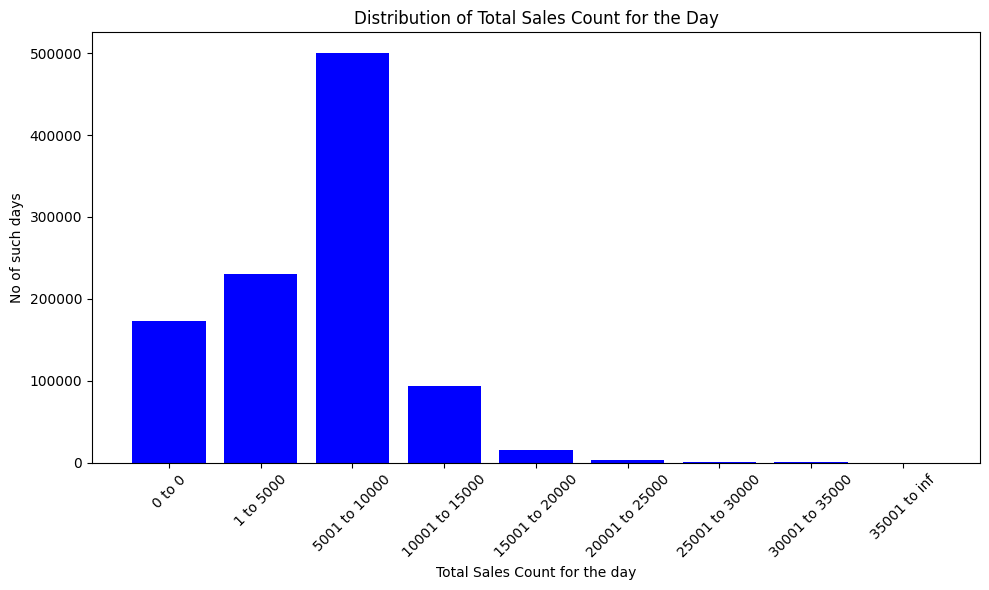

In [ ]:
import matplotlib.pyplot as plt

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(sales_days_df['Total Sales Count for the day'], sales_days_df['No of such days'], color='blue')
plt.xlabel('Total Sales Count for the day')
plt.ylabel('No of such days')
plt.title('Distribution of Total Sales Count for the Day')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()


Observations:

- The majority of days (around 73.5%) have total sales between 0 and 5000.
- The next significant range is between 5000 and 10000, comprising approximately 46% of the days.
- Days with total sales exceeding 35000 are relatively rare, accounting for only 0.0018% of the total days.
- Days with higher sales tend to occur less frequently, with the number of days gradually decreasing as the sales range increases.
- The distribution suggests that the store experiences more days with moderate sales compared to high or very low sales.

## **Data Visualisation**

### Sales Trend Analysis

In [ ]:
combined_data['Date'] = pd.to_datetime(combined_data['Date'])

In [ ]:
# Extracting year and month from Date using datetime functionalities
combined_data['Year']  = combined_data['Date'].dt.year
combined_data['Month'] = combined_data['Date'].dt.month

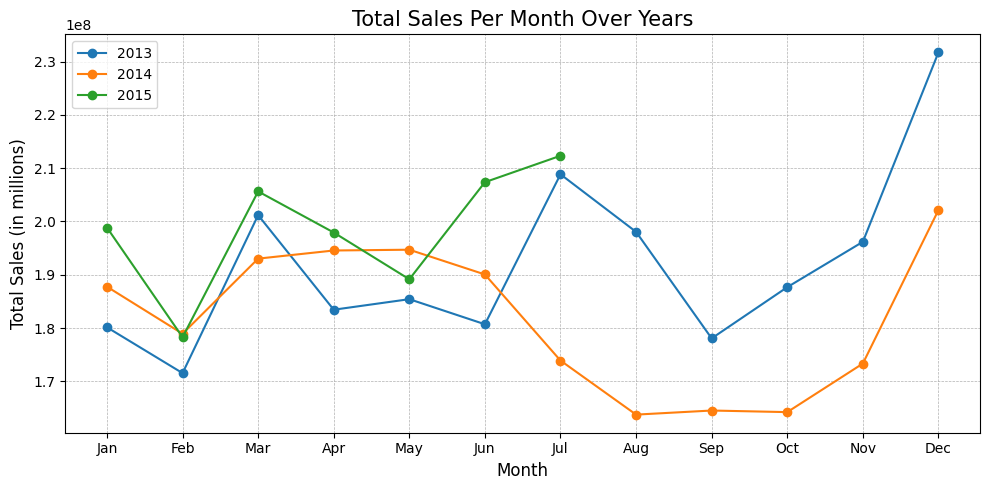

In [ ]:
# Grouping by Year and Month to get total sales per month for each year
monthly_sales = combined_data.groupby(['Year', 'Month'])['Sales'].sum().reset_index()

plt.figure(figsize=(10, 5))

# Plotting the total sales per month with separate lines for each year
for year in monthly_sales['Year'].unique():
    subset = monthly_sales[monthly_sales['Year'] == year]
    plt.plot(subset['Month'], subset['Sales'], label=year, marker='o')

# Enhancing title, labels, and ticks
plt.title('Total Sales Per Month Over Years', fontsize=15)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales (in millions)', fontsize=12)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


Key takeaways:

- Seasonal Trends: Sales exhibit a clear seasonal pattern each year. The trends are quite consistent across the three years, suggesting a strong seasonality in sales.

- Holiday Boost: There's a noticeable spike in sales in December. This is likely due to the holiday season, where people tend to purchase more, and there might be holiday promotions boosting sales.

- Mid-year Dip: Sales tend to dip around the months of July and August. This could be attributed to the summer season where consumers might be on vacation, and general shopping could be reduced.

- Post-summer Increase: After the summer dip, there's a slight increase in sales during September. This could be related to back-to-school shopping or post-summer promotions.

- 2015 Discrepancy: There's a noticeable drop in sales in 2015 compared to the previous years. It's essential to cross-verify if the dataset for 2015 is complete or if there were external factors (like economic downturns) affecting sales that year. If the dataset ends partway through 2015, this could explain the drop.

- Consistent Behavior: The overall behavior of sales across the months is consistent for 2013 and 2014, indicating stable consumer behavior and business operations during these years.

- Magnitude: The sales, aggregated on a monthly basis, range in the order of millions, indicating the significant scale of operations of the Rossmann stores.

### Visualizing total sales by "day of the week"

We check what does value 1 of DayOfWeek column interpret to, ie Sunday or Monday

In [ ]:
# Checking the day name for DayOfWeek value of 1
day_name_for_1 = combined_data[combined_data['DayOfWeek'] == 1]['Date'].dt.day_name().iloc[0]

# Checking the day name for DayOfWeek value of 7
day_name_for_7 = combined_data[combined_data['DayOfWeek'] == 7]['Date'].dt.day_name().iloc[0]

f"The value '1' in the DayOfWeek column corresponds to '{day_name_for_1}', and the value '7' corresponds to '{day_name_for_7}'."



"The value '1' in the DayOfWeek column corresponds to 'Monday', and the value '7' corresponds to 'Sunday'."

Visualizing total sales by "day of the week" using a bar plot

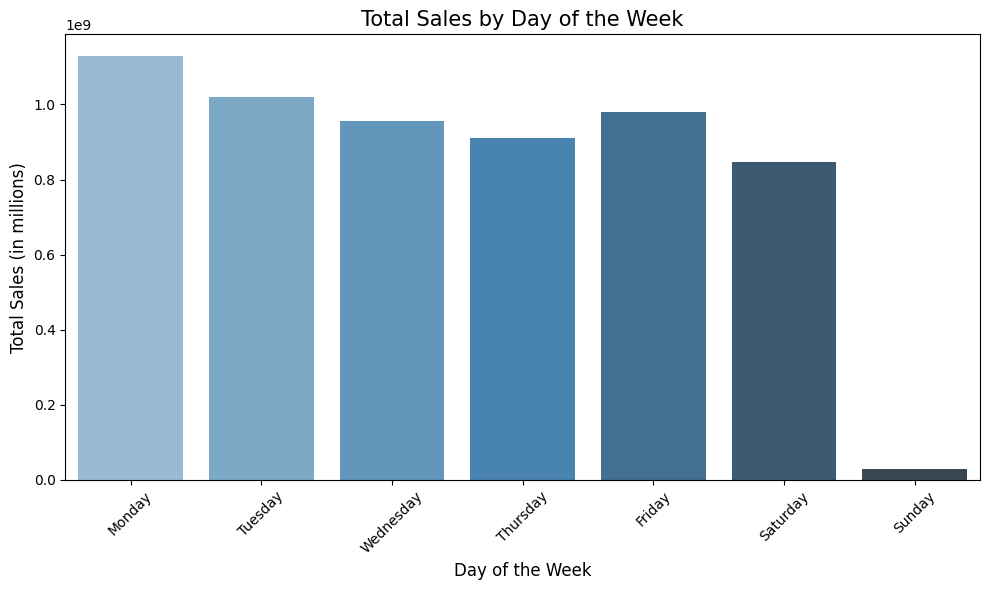

In [ ]:
combined_data['Derived_DayName'] = combined_data['Date'].dt.day_name()

# Grouping by the derived day name to get total sales for each day of the week
daily_sales_by_name = combined_data.groupby('Derived_DayName')['Sales'].sum().reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]).reset_index()

# Plotting total sales for each day of the week
plt.figure(figsize=(10, 6))
sns.barplot(x='Derived_DayName', y='Sales', data=daily_sales_by_name, palette="Blues_d")
plt.title('Total Sales by Day of the Week', fontsize=15)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Total Sales (in millions)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Observations:

- Sales peak towards the beginning of the week, with Monday showing the highest sales.
- There's a gradual decline in sales as the week progresses, with the lowest sales on Sundays.
- This pattern suggests that the early weekdays are crucial for Rossmann stores in terms of sales, and operational strategies should be aligned accordingly.

***We observed an interesting trend***: sales were significantly higher on Mondays compared to Sundays.

To understand the underlying factors contributing to this pattern, we decided to visualize two potential influencers of sales:

- Store Operations: The number of stores that are open can significantly impact the total sales for any given day. For instance, if a large number of stores are closed on a particular day (e.g., Sunday), it would naturally lead to lower sales. By plotting the number of open stores for each day of the week, we aimed to understand if operational hours played a role in the observed sales trend.
- Promotional Activities: Promotions and discounts can act as strong sales drivers. If Rossmann runs more promotions on certain days, it could lead to increased sales on those days. By visualizing the distribution of promotions across the week, we aimed to ascertain if promotional activities were more concentrated at the beginning of the week, especially on Mondays.


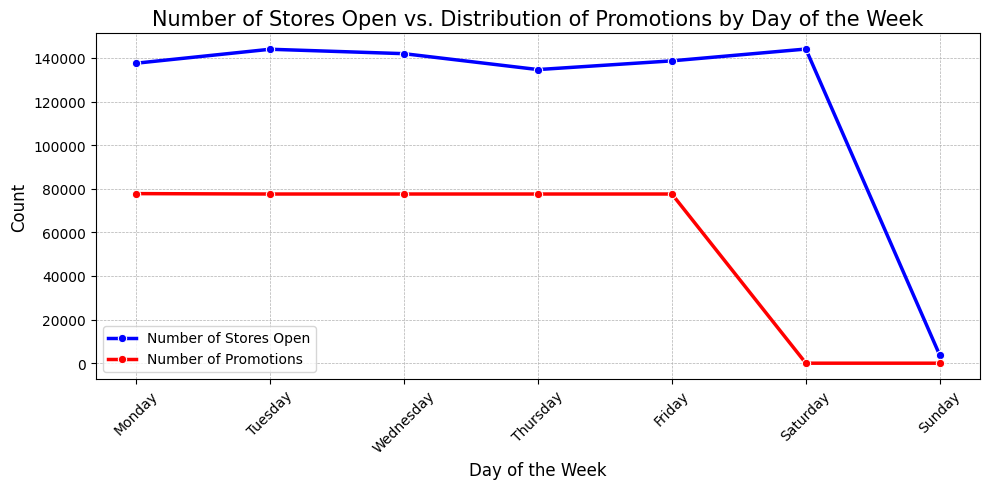

In [ ]:
# Grouping by the derived day name to see the number of stores open on each day of the week
store_operations = combined_data.groupby('Derived_DayName')['Open'].sum().reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]).reset_index()

# Grouping by the derived day name to see the distribution of promotions for each day of the week
promo_distribution = combined_data.groupby('Derived_DayName')['Promo'].sum().reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]).reset_index()

# Combining store operations and promo distribution data
combined_plot_data = store_operations.merge(promo_distribution, on="Derived_DayName")

# Plotting the number of stores open and distribution of promotions for each day of the week on the same plot
plt.figure(figsize=(10, 5))

# Plot for number of stores open
sns.lineplot(x='Derived_DayName', y='Open', data=combined_plot_data, marker='o', label='Number of Stores Open', color='blue', linewidth=2.5)

# Plot for distribution of promotions
sns.lineplot(x='Derived_DayName', y='Promo', data=combined_plot_data, marker='o', label='Number of Promotions', color='red', linewidth=2.5)

plt.title('Number of Stores Open vs. Distribution of Promotions by Day of the Week', fontsize=15)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()



Confirmation:

The combined line graph provides a clear explanation for our initial observation. The fact that a large number of Rossmann stores are closed on Sundays results in significantly lower sales for that day. On the other hand, the high number of promotions on Mondays, coupled with a large number of stores being open, explains the spike in sales observed for that day.

So, our initial observation about Monday showing a lot more sales than Sunday, and Sunday having almost no sales, is indeed accurate and can be attributed to the combined effects of store operations and promotional activities. The visualization effectively corroborates our initial findings with data-driven insights.

### visualizing the average sales for days with promotions (Promo = 1) versus days without promotions (Promo = 0):

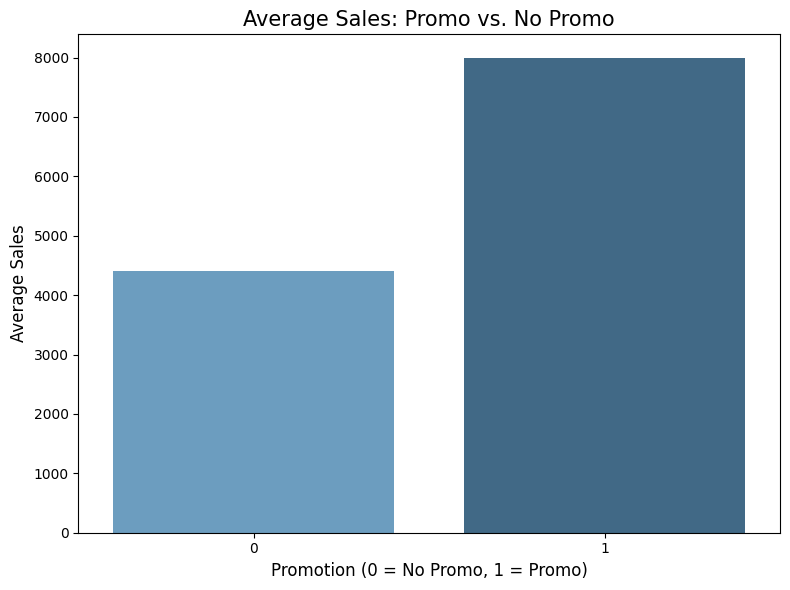

In [ ]:
# Grouping by Promo to get average sales for each category (Promo or No Promo)
avg_sales_by_promo = combined_data.groupby('Promo')['Sales'].mean().reset_index()

# Plotting the average sales for Promo vs. No Promo
plt.figure(figsize=(8, 6))
sns.barplot(x='Promo', y='Sales', data=avg_sales_by_promo, palette="Blues_d")
plt.title('Average Sales: Promo vs. No Promo', fontsize=15)
plt.xlabel('Promotion (0 = No Promo, 1 = Promo)', fontsize=12)
plt.ylabel('Average Sales', fontsize=12)
plt.tight_layout()
plt.show()


Observations:

- The average sales on days with promotions are significantly higher than on days without promotions.
- This emphasizes the positive impact of promotional activities on sales.

In essence, promotions are effective in driving higher sales for Rossmann stores, as evident from the bar chart.

### Visualizing the average daily sales based on the StateHoliday column:

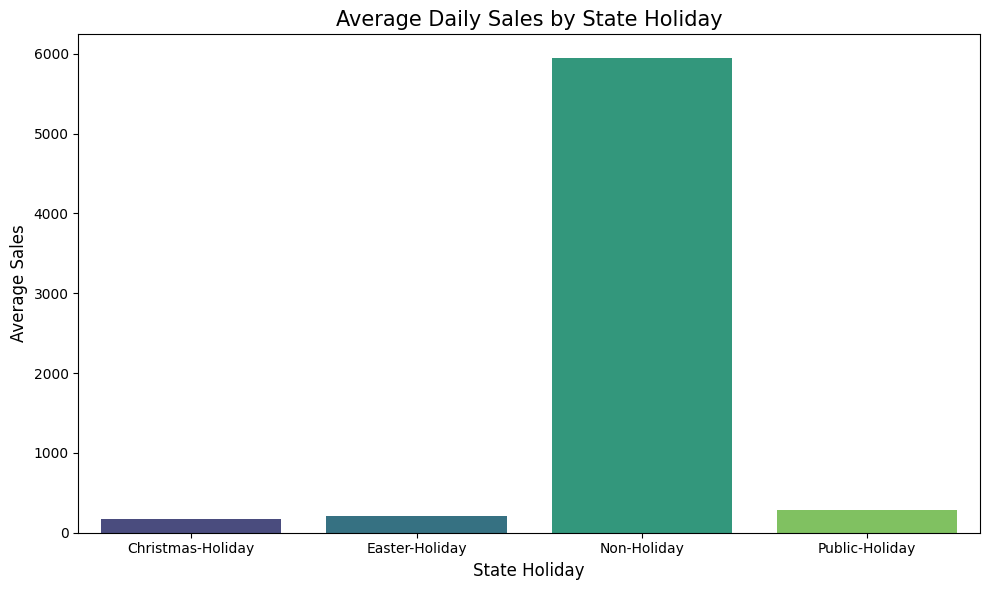

In [ ]:
# Grouping by StateHoliday to get average sales for each StateHoliday category
avg_sales_by_stateholiday_updated = combined_data.groupby('StateHoliday')['Sales'].mean().reset_index()

# Plotting the average sales for different state holidays after renaming
plt.figure(figsize=(10, 6))
sns.barplot(x='StateHoliday', y='Sales', data=avg_sales_by_stateholiday_updated, palette="viridis")
plt.title('Average Daily Sales by State Holiday', fontsize=15)
plt.xlabel('State Holiday', fontsize=12)
plt.ylabel('Average Sales', fontsize=12)
plt.tight_layout()
plt.show()


Observations:
- Non-Holiday Days: These represent the vast majority of the days in the dataset, and the average daily sales on such days (labeled as "Non-Holiday") are the highest. This could be because of consistent shopping patterns on regular days and the presence of other factors or promotions not related to state holidays driving sales.
- Public-Holiday: Surprisingly, the average daily sales on public holidays are lower than on non-holiday days. This could be due to fewer operational hours, specific stores being closed, or customers choosing to stay at home or engage in non-shopping activities.
- Easter-Holiday: Easter holidays see a further dip in average daily sales. This might be due to specific cultural or regional practices during Easter that affect shopping.
- Christmas-Holiday: The days marked as Christmas holidays, while higher than Easter and public holidays, still fall short of the average sales on non-holiday days. This could be attributed to fewer operational hours, stores being closed, or people spending time with family rather than shopping.


### Visualizing the average sales based on the SchoolHoliday column:

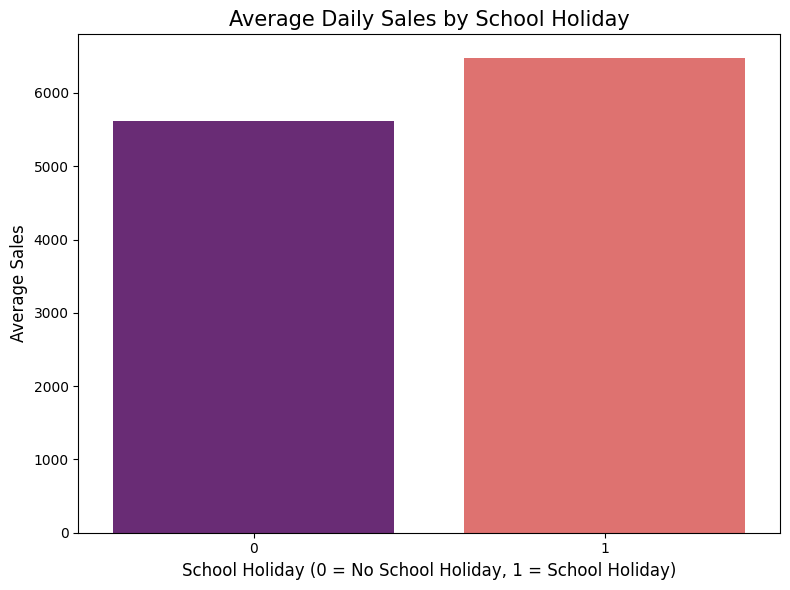

In [ ]:
# Grouping by SchoolHoliday to get average sales for each category
avg_sales_by_schoolholiday = combined_data.groupby('SchoolHoliday')['Sales'].mean().reset_index()

# Plotting the average sales for days with and without school holidays
plt.figure(figsize=(8, 6))
sns.barplot(x='SchoolHoliday', y='Sales', data=avg_sales_by_schoolholiday, palette="magma")
plt.title('Average Daily Sales by School Holiday', fontsize=15)
plt.xlabel('School Holiday (0 = No School Holiday, 1 = School Holiday)', fontsize=12)
plt.ylabel('Average Sales', fontsize=12)
plt.tight_layout()
plt.show()


Observation:

The presence of a school holiday seems to have a positive impact on the sales of Rossmann stores. This suggests that families or parents might be more inclined to shop on days when their children are not in school.


### Visualizing the average sales based on the StoreType column

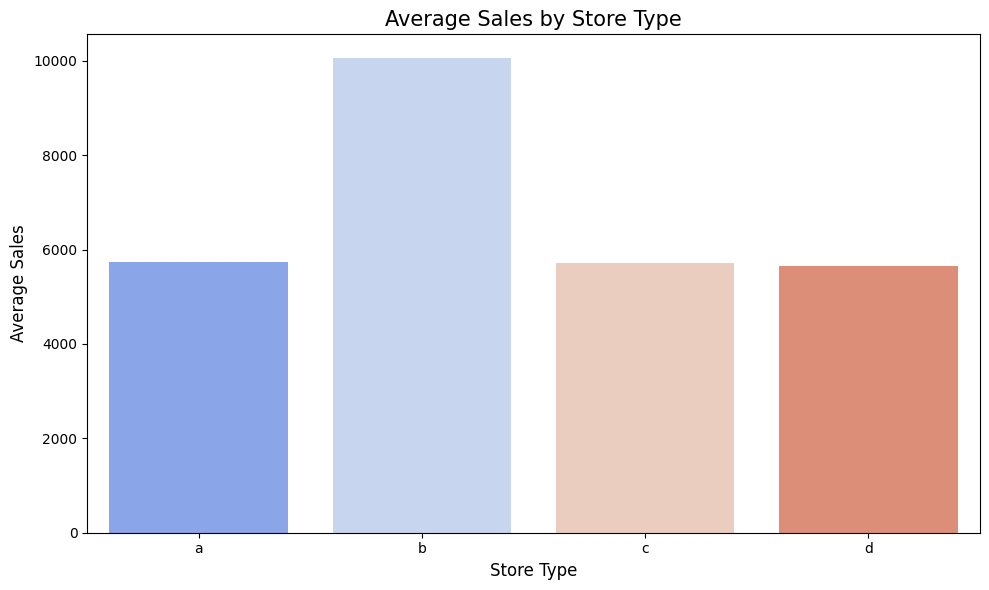

In [ ]:
# Grouping by StoreType to get average sales for each category
avg_sales_by_storetype = combined_data.groupby('StoreType')['Sales'].mean().reset_index()

# Plotting the average sales for different store types
plt.figure(figsize=(10, 6))
sns.barplot(x='StoreType', y='Sales', data=avg_sales_by_storetype, palette="coolwarm")
plt.title('Average Sales by Store Type', fontsize=15)
plt.xlabel('Store Type', fontsize=12)
plt.ylabel('Average Sales', fontsize=12)
plt.tight_layout()
plt.show()


Observation : while all store types contribute significantly to the company's revenue, Store Type B stands out with the highest average sales.

### Visualizing the average sales based on the Assortment column

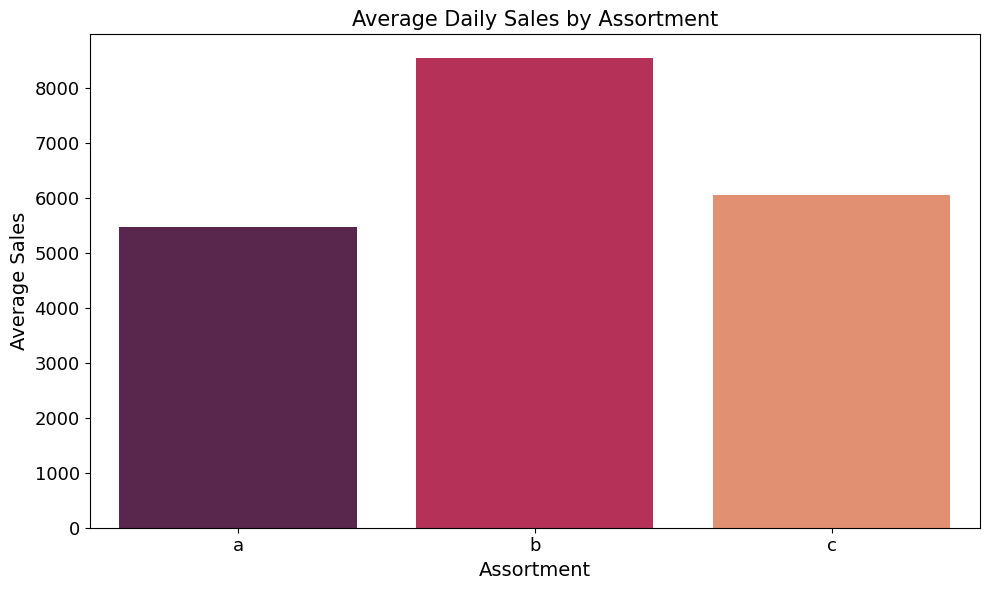

In [ ]:
# Grouping by Assortment to get average sales for each category
avg_sales_by_assortment = combined_data.groupby('Assortment')['Sales'].mean().reset_index()

# Plotting the average sales for different assortments
plt.figure(figsize=(10, 6))
sns.barplot(x='Assortment', y='Sales', data=avg_sales_by_assortment, palette="rocket")
plt.title('Average Daily Sales by Assortment', fontsize=15)
plt.xlabel('Assortment', fontsize=14)
plt.ylabel('Average Sales', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.tight_layout()
plt.show()


Observations:

- Basic (a): Stores with a basic assortment exhibit average sales similar to those with an extended assortment. This suggests that offering a limited range of products doesn't necessarily result in lower sales if the products meet customers' needs.

- Extra (b): Stores with an extra assortment show significantly higher average sales compared to the other two categories. This indicates that a broader and possibly specialized range of products attracts customers and drives higher sales.
- Extended (c): Despite offering an extensive variety of products, stores with an extended assortment have average sales comparable to those with a basic assortment. This suggests that merely increasing the assortment size doesn't guarantee higher sales; the specific assortment composition plays a significant role.

The chart underscores the importance of a well-curated assortment strategy. While a broader range of products can attract customers, the selection and appeal of products within the assortment are equally crucial in driving sales. An "extra" assortment that strikes the right balance between variety and specialization appears to have a substantial impact on boosting sales.

### Visualising the potential relationship between 'Sales' vs 'CompetitionDistance'

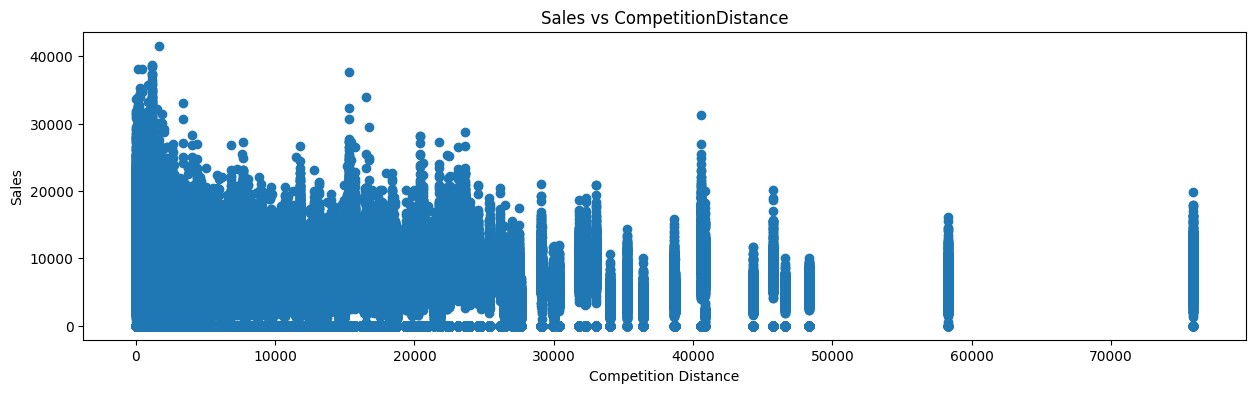

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot
plt.figure(figsize=(15, 4))
plt.scatter(combined_data['CompetitionDistance'], combined_data['Sales'])
plt.title('Sales vs CompetitionDistance')
plt.xlabel('Competition Distance')
plt.ylabel('Sales')
plt.show()


## **Preprocessing**

### Dealing with missing values

Identify Missing Values: Begin by identifying which columns have missing values and the extent of the missing data. You can use functions like .isnull() and .sum() to identify missing values in each column.

In [ ]:
# Identify missing values (NaN and None) in the DataFrame
missing_values = combined_data.isnull().sum()

# Display the count of missing values for each column
print("Missing values in each column:")
print(missing_values)


Missing values in each column:
Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
Year                              0
Month                             0
Derived_DayName                   0
dtype: int64


Approach to fill the missing value:

- For Promo2SinceWeek, Promo2SinceYear, and PromoInterval, we will fill the null values with 0. Justification: since these columns represent information about whether a store is participating in Promo2, and missing values likely indicate that the store is not participating.

- For CompetitionDistance, we will fill the null values with the mean of the distances given for all other stores. Justification: This approach provides a reasonable estimate for missing values based on the available data.

- For CompetitionOpenSinceMonth and CompetitionOpenSinceYear, we will fill the null values with the most occurring month and year, respectively. Justification: This is a reasonable assumption since it's likely that most stores had similar opening dates.

In [ ]:
# Fill missing values in Promo2SinceWeek, Promo2SinceYear, and PromoInterval with 0
combined_data['Promo2SinceWeek'].fillna(0, inplace=True)
combined_data['Promo2SinceYear'].fillna(0, inplace=True)
combined_data['PromoInterval'].fillna(0, inplace=True)

# Fill missing values in CompetitionDistance with the mean of available distances
mean_distance = combined_data['CompetitionDistance'].mean()
combined_data['CompetitionDistance'].fillna(mean_distance, inplace=True)

# Fill missing values in CompetitionOpenSinceMonth with the most common month
most_common_month = combined_data['CompetitionOpenSinceMonth'].mode()[0]
combined_data['CompetitionOpenSinceMonth'].fillna(most_common_month, inplace=True)

# Fill missing values in CompetitionOpenSinceYear with the most common year
most_common_year = combined_data['CompetitionOpenSinceYear'].mode()[0]
combined_data['CompetitionOpenSinceYear'].fillna(most_common_year, inplace=True)

# Verify missing values after filling
missing_values_after_filling = combined_data.isnull().sum()
missing_values_after_filling


Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
Year                         0
Month                        0
Derived_DayName              0
dtype: int64

In [ ]:
missing_values = combined_data.isnull().sum()
missing_values


Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
Year                         0
Month                        0
Derived_DayName              0
dtype: int64

## Managing Outliers

We will create a grid of box plots for the specified columns ('Sales', 'CompetitionDistance', 'Promo2SinceWeek', 'Customers'. Rationale for choosing the columns 'Sales', 'CompetitionDistance', 'Promo2SinceWeek', and 'Customers' for visualization of outliers using box plots:

- Sales: As the primary target variable, understanding the distribution of sales values is essential. Box plots can help identify any extreme or unusual sales values that might indicate anomalies or outliers. This is important for detecting unusually high or low sales figures that could impact overall analysis and modeling.
- CompetitionDistance: Competition distance represents the distance to the nearest competitor store. Outliers in this column might indicate instances where the store faces significantly different levels of competition. These outliers could provide insights into the store's market positioning and competitive landscape.
- Promo2SinceWeek: This column indicates the calendar week when the store started participating in Promo2. Outliers in this column might represent cases where stores have started participating in Promo2 at a much later or earlier time compared to the majority. Identifying such cases can help in understanding the impact of Promo2 participation on sales.
- Customers: While not the primary target variable, understanding the distribution of customer counts is crucial. Outliers in this column could indicate unusually high customer footfall on certain days, which could have an impact on sales. Analyzing these outliers can provide insights into customer behavior and demand patterns.


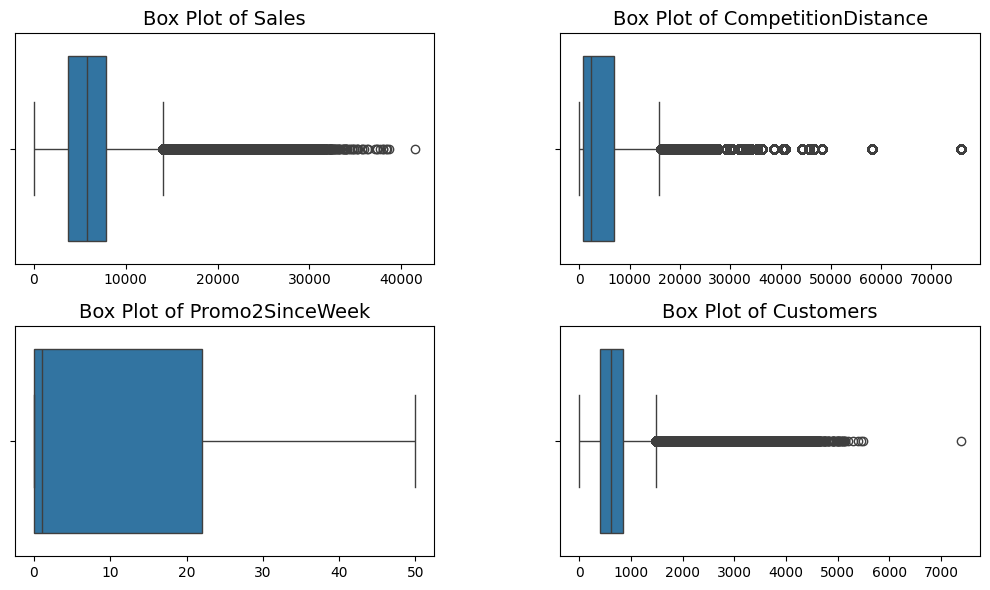

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns to visualize outliers
columns_to_visualize = ['Sales', 'CompetitionDistance', 'Promo2SinceWeek', 'Customers']

# Create a grid of box plots
plt.figure(figsize=(10, 6))
for i, column in enumerate(columns_to_visualize, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=combined_data, x=column)  # Use x=column instead of y=column
    plt.title(f'Box Plot of {column}', fontsize=14)  # Increase font size
    plt.xlabel('')  # Remove x-axis label for better space utilization
    plt.tight_layout()

plt.subplots_adjust(wspace=0.3)  # Adjust the width between subplots
plt.show()


Droping sales which are greater than 30k as they are very less in the dataset and are probably outliers

In [ ]:
combined_data.drop(combined_data.loc[combined_data['Sales'] > 30000].index,inplace=True)
combined_data.shape

(1017056, 21)

In [ ]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1017056 entries, 0 to 1017208
Data columns (total 21 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017056 non-null  int64         
 1   DayOfWeek                  1017056 non-null  int64         
 2   Date                       1017056 non-null  datetime64[ns]
 3   Sales                      1017056 non-null  int64         
 4   Customers                  1017056 non-null  int64         
 5   Open                       1017056 non-null  int64         
 6   Promo                      1017056 non-null  int64         
 7   StateHoliday               1017056 non-null  object        
 8   SchoolHoliday              1017056 non-null  int64         
 9   StoreType                  1017056 non-null  object        
 10  Assortment                 1017056 non-null  object        
 11  CompetitionDistance        1017056 non-nul

 ### The Date column:

- we have already extracted the relevant information from 'Date' column (such as Year and Month).
- The Date column itself is no longer needed for modeling purposes, and keeping it might introduce unnecessary noise to your data.

Hence would drop the Date column.

In [ ]:
# create a deep copy combined_data DataFrame to a new DataFrame called combined_data_with_date
combined_data_with_date = combined_data.copy()

combined_data.drop(['Date'],axis=1,inplace=True)

In [ ]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1017056 entries, 0 to 1017208
Data columns (total 20 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017056 non-null  int64  
 1   DayOfWeek                  1017056 non-null  int64  
 2   Sales                      1017056 non-null  int64  
 3   Customers                  1017056 non-null  int64  
 4   Open                       1017056 non-null  int64  
 5   Promo                      1017056 non-null  int64  
 6   StateHoliday               1017056 non-null  object 
 7   SchoolHoliday              1017056 non-null  int64  
 8   StoreType                  1017056 non-null  object 
 9   Assortment                 1017056 non-null  object 
 10  CompetitionDistance        1017056 non-null  float64
 11  CompetitionOpenSinceMonth  1017056 non-null  float64
 12  CompetitionOpenSinceYear   1017056 non-null  float64
 13  Promo2           

### Encoding Categorical Variables and Mapping Specific Values

StoreType, Assortment, and Derived_DayName Columns:

- Apply LabelEncoder to convert categorical categories into numerical codes.
- LabelEncoder assigns unique numerical codes to each category.
- Suitable for nominal categories without inherent order.
- Converts categorical data into a format suitable for machine learning models.
- Helps in maintaining data integrity and consistency while training models.


PromoInterval Column:

- Map promo intervals to numeric representations using a predefined mapping.
- The predefined mapping assigns specific numerical codes to each interval.
- This approach helps numerical models understand the intervals without introducing ordinal relationships.


StateHoliday Column:

- Apply a mapping to convert categorical values ('a', 'b', 'c') to numerical codes (1, 2, 3).
- This mapping is useful when the categories have an ordinal relationship.
- Numerical representation enables numerical models to process the data.


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode StoreType, Assortment, and Derived_DayName columns
combined_data['StoreType'] = label_encoder.fit_transform(combined_data['StoreType'])
combined_data['Assortment'] = label_encoder.fit_transform(combined_data['Assortment'])
combined_data['Derived_DayName'] = label_encoder.fit_transform(combined_data['Derived_DayName'])

# Map PromoInterval values to numeric codes, handling missing values
promo_interval_mapping = {
    "Jan,Apr,Jul,Oct": 1,
    "Feb,May,Aug,Nov": 2,
    "Mar,Jun,Sept,Dec": 3
}
combined_data["PromoInterval"] = combined_data["PromoInterval"].map(promo_interval_mapping).fillna(0)


# Encode the StateHoliday column
combined_data['StateHoliday'] = label_encoder.fit_transform(combined_data['StateHoliday'])

# Print the encoded_data DataFrame info
combined_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1017056 entries, 0 to 1017208
Data columns (total 20 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017056 non-null  int64  
 1   DayOfWeek                  1017056 non-null  int64  
 2   Sales                      1017056 non-null  int64  
 3   Customers                  1017056 non-null  int64  
 4   Open                       1017056 non-null  int64  
 5   Promo                      1017056 non-null  int64  
 6   StateHoliday               1017056 non-null  int64  
 7   SchoolHoliday              1017056 non-null  int64  
 8   StoreType                  1017056 non-null  int64  
 9   Assortment                 1017056 non-null  int64  
 10  CompetitionDistance        1017056 non-null  float64
 11  CompetitionOpenSinceMonth  1017056 non-null  float64
 12  CompetitionOpenSinceYear   1017056 non-null  float64
 13  Promo2           

## Thus, the dataframe combined_data is done with the preprocessing step

## **Heatmap of the correlation matrix for the columns in the combined_data DataFrame**

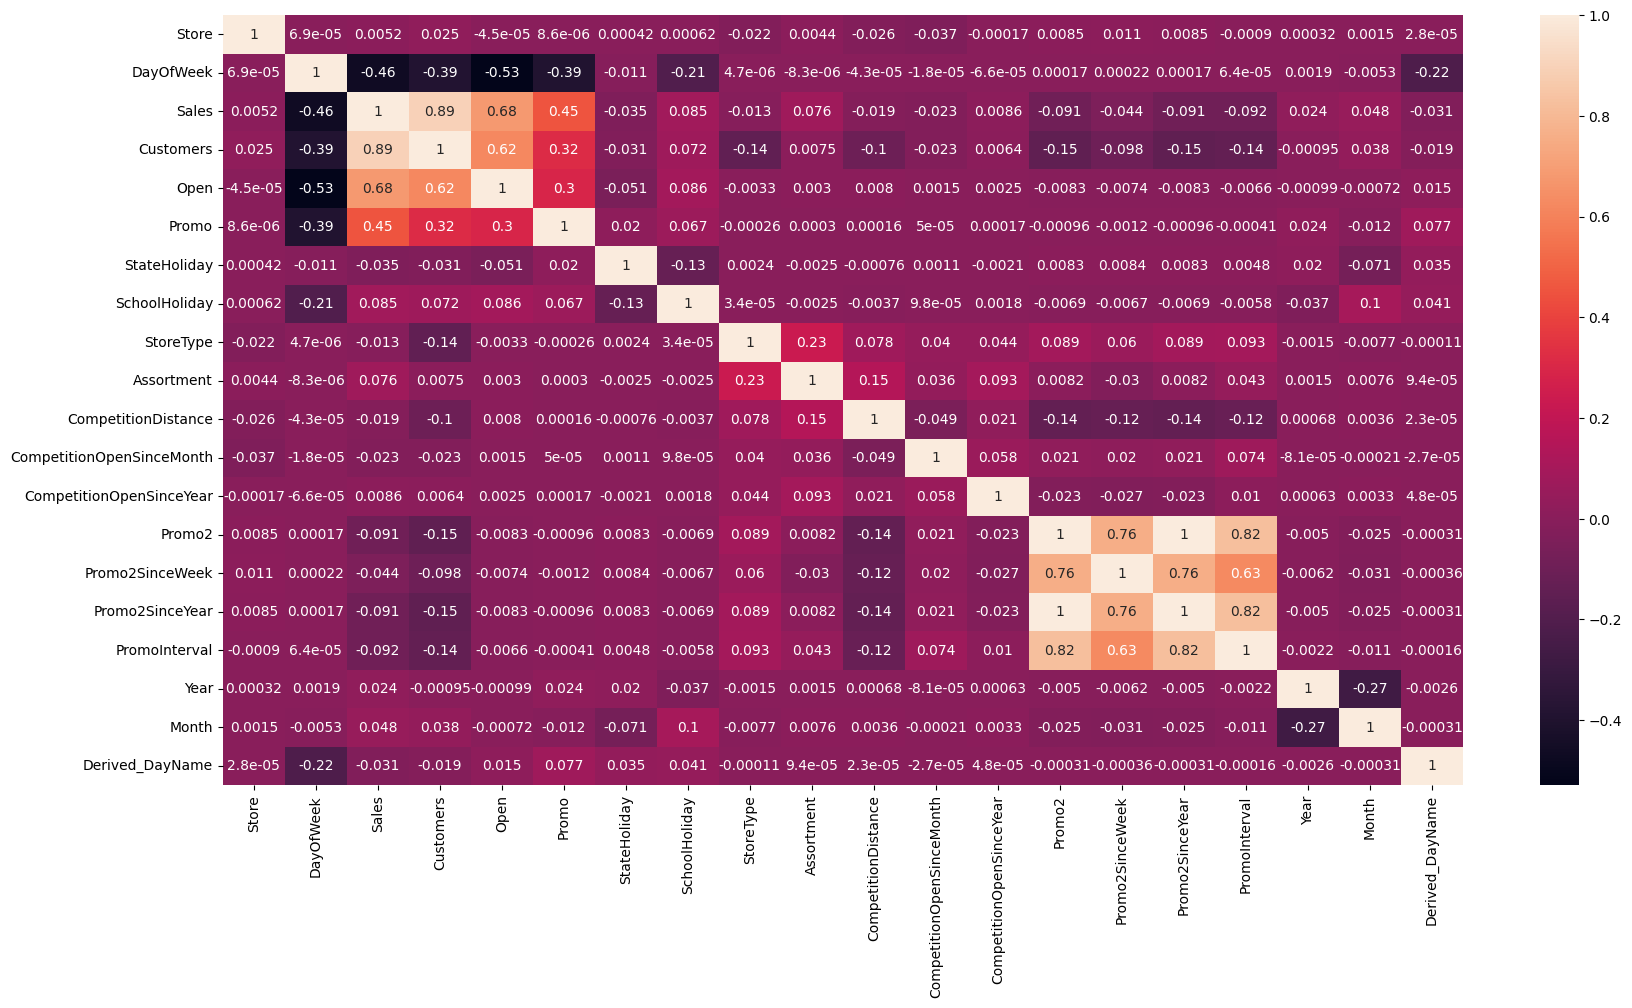

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(combined_data.corr(), annot=True)
plt.show()

### **Observation from the correlation matrix**

1. Sales and Customers: There is a strong positive correlation (approximately 0.89) between the 'Sales' and 'Customers' columns. This suggests that when the number of customers increases, the sales tend to increase as well.

2. Open and Sales: The 'Open' column has a positive correlation of approximately 0.68 with 'Sales'. This indicates that when the store is open, higher sales are generally observed.

3. Promo and Sales: The 'Promo' column has a positive correlation of approximately 0.45 with 'Sales'. This suggests that when there is a promotion (Promo=1), there tends to be higher sales.

4. SchoolHoliday and Customers: The 'SchoolHoliday' column has a positive correlation of approximately 0.07 with 'Customers'. This indicates that during school holidays, there might be slightly more customers.

5. CompetitionDistance and Sales: There is a weak negative correlation (approximately -0.02) between 'CompetitionDistance' and 'Sales'. This suggests that as the distance to the nearest competitor increases, sales may slightly decrease.

6. Promo2 and Promo2SinceWeek/Year: The 'Promo2' column has a strong positive correlation with 'Promo2SinceWeek' and 'Promo2SinceYear' (approximately 0.76). This indicates that when there is a continuous promotion (Promo2=1), the corresponding fields for the promotion period have consistent values.

7. Year and Month: There is a strong negative correlation (approximately -0.27) between 'Year' and 'Month'. This is expected, as the year and month are inversely related due to the time progression.

8. DayOfWeek and Sales: The 'DayOfWeek' column has a negative correlation of approximately -0.46 with 'Sales'. This suggests that certain days of the week may have lower sales compared to others.

9. StateHoliday and SchoolHoliday: The 'StateHoliday' column has a negative correlation of approximately -0.13 with 'SchoolHoliday'. This suggests that state holidays and school holidays are somewhat inversely related.

10. Derived_DayName and DayOfWeek: The 'Derived_DayName' column has a negative correlation of approximately -0.22 with 'DayOfWeek'. This indicates that the derived day name and day of the week are related, but not exactly the same.

## **Data Splitting and Model Evaluation**

### Important consideration wrt Stores, which are closed.  

If a store is closed, there won't be any sales, and therefore, there's nothing to predict. In this context, it might make sense to exclude the data for closed stores from your training dataset. Here's why:

- Realistic Training: Including data from closed stores in the training set could introduce noise and might not help the model understand the patterns and relationships that lead to sales. While we are training the model to predict sales based on certain features, and when the store is closed, those features might not be relevant for predicting zero sales.

- Bias and Overfitting: Including data for closed stores might lead to overfitting, where the model becomes too specific to the training data and doesn't generalize well to new data. It could introduce a bias towards predicting sales for closed stores when, in reality, sales are always zero when the store is closed.



In [ ]:
# checking value count on Open column
value_counts = combined_data['Open'].value_counts()
print(value_counts)


Open
1    844239
0    172817
Name: count, dtype: int64


Just to confirm, there is no Sales data when the store is not Open

In [ ]:
total_sales_open = combined_data[combined_data['Open'] == 1]['Sales'].sum()
total_sales_closed = combined_data[combined_data['Open'] == 0]['Sales'].sum()

print("Total Sales when Open = 1:", total_sales_open)
print("Total Sales when Open = 0:", total_sales_closed)


Total Sales when Open = 1: 5868240264
Total Sales when Open = 0: 0


### Decision for excluding 'Customers' and 'Open' columns

The rationale behind excluding these columns:

'Customers' Column:

- The 'Customers' column represents the number of customers who visited the store on a given day.
- Including this column as a feature in the model would be data leakage. The number of customers is closely related to the target variable ('Sales'), as higher customer numbers often lead to higher sales.
- However, the goal of the prediction task is to predict sales based on other factors, such as store attributes, promotions, holidays, etc., rather than relying on information that may not be available during the prediction phase.

'Open' Column:

- We have already dealt with this column, and now there is no reason to continue with this column

In [ ]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1017056 entries, 0 to 1017208
Data columns (total 20 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017056 non-null  int64  
 1   DayOfWeek                  1017056 non-null  int64  
 2   Sales                      1017056 non-null  int64  
 3   Customers                  1017056 non-null  int64  
 4   Open                       1017056 non-null  int64  
 5   Promo                      1017056 non-null  int64  
 6   StateHoliday               1017056 non-null  int64  
 7   SchoolHoliday              1017056 non-null  int64  
 8   StoreType                  1017056 non-null  int64  
 9   Assortment                 1017056 non-null  int64  
 10  CompetitionDistance        1017056 non-null  float64
 11  CompetitionOpenSinceMonth  1017056 non-null  float64
 12  CompetitionOpenSinceYear   1017056 non-null  float64
 13  Promo2           

### Data Splitting

The data is split into training and testing sets using the train_test_split function from the sklearn.model_selection module. The training set contains 80% of the data, while the testing set contains 20% of the data. The random_state parameter ensures reproducibility of the split.

In [ ]:
from sklearn.model_selection import train_test_split

combined_data_subset = combined_data[combined_data['Open'] == 1]
combined_data_subset_closed = combined_data[combined_data['Open'] == 0]
x_train, x_test, y_train, y_test_open = train_test_split(combined_data_subset.drop(['Sales','Customers', 'Open'],axis=1),
                                                    combined_data_subset['Sales'],test_size=0.20)

In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 675391 entries, 533521 to 450050
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Store                      675391 non-null  int64  
 1   DayOfWeek                  675391 non-null  int64  
 2   Promo                      675391 non-null  int64  
 3   StateHoliday               675391 non-null  int64  
 4   SchoolHoliday              675391 non-null  int64  
 5   StoreType                  675391 non-null  int64  
 6   Assortment                 675391 non-null  int64  
 7   CompetitionDistance        675391 non-null  float64
 8   CompetitionOpenSinceMonth  675391 non-null  float64
 9   CompetitionOpenSinceYear   675391 non-null  float64
 10  Promo2                     675391 non-null  int64  
 11  Promo2SinceWeek            675391 non-null  float64
 12  Promo2SinceYear            675391 non-null  float64
 13  PromoInterval              67

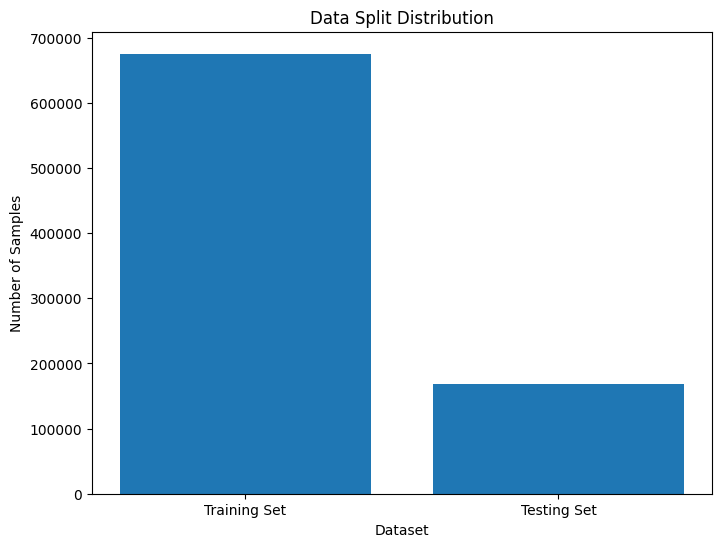

In [ ]:


# Import the necessary libraries
import matplotlib.pyplot as plt

# Create a bar chart to visualize the data split
plt.figure(figsize=(8, 6))
plt.bar(['Training Set', 'Testing Set'], [len(x_train), len(x_test)])
plt.xlabel('Dataset')
plt.ylabel('Number of Samples')
plt.title('Data Split Distribution')
plt.show()


In [ ]:
epsilon = 1e-10

### Creating an empty DataFrame to store performance scores

In [ ]:
import pandas as pd

# Initialize an empty DataFrame with the specified columns
performance_df = pd.DataFrame(columns=['Model Name', 'r2_Score', 'Mean Absolute Error', 'Root Mean Squared Error'])

# Display the empty DataFrame
performance_df


Empty DataFrame
Columns: [Model Name, r2_Score, Mean Absolute Error, Root Mean Squared Error]
Index: []

## **Model Building**

### Model1: Linear Regression

r2 0.7793130304732327
mae 989.4912737738929
rmse 1926.0850758987265
          Model Name  r2_Score  Mean Absolute Error  Root Mean Squared Error
0  Linear Regression  0.779313           989.491274              1926.085076


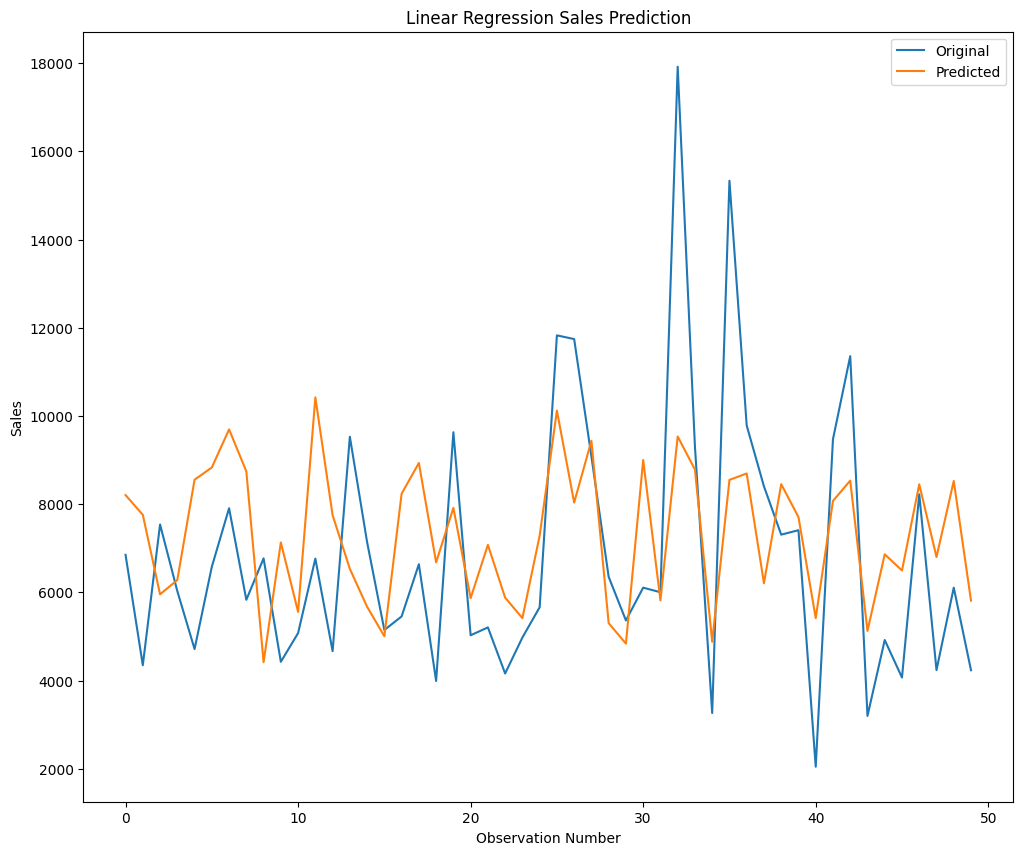

In [ ]:
import pandas as pd
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import math

# Initialize performance DataFrame
performance_df = pd.DataFrame(columns=['Model Name', 'r2_Score', 'Mean Absolute Error', 'Root Mean Squared Error'])

# Train the model
from sklearn import linear_model
reg_model = linear_model.LinearRegression()
reg_model.fit(x_train, y_train)

# Predictions
prediction_open = reg_model.predict(x_test)
prediction_closed = np.zeros(combined_data_subset_closed.shape[0])
prediction = np.append(prediction_open, prediction_closed)

# Append zeros to y_test_open
y_test = np.append(y_test_open, np.zeros(combined_data_subset_closed.shape[0]))

# Compute metrics
r2 = r2_score(y_test, prediction)
mae = mean_absolute_error(y_test, prediction)
rmse = math.sqrt(mean_squared_error(y_test, prediction))

# Store the performance metrics in the performance_df DataFrame
new_model_metrics = {
    'Model Name': 'Linear Regression',
    'r2_Score': r2,
    'Mean Absolute Error': mae,
    'Root Mean Squared Error': rmse
}
# performance_df = performance_df.append(new_model_metrics, ignore_index=True)
performance_df.loc[0] = ['Linear Regression', r2, mae, rmse]
print("r2",r2)
print("mae",mae)
print("rmse",rmse)
# Display the performance_df DataFrame
print(performance_df)

plt.figure(figsize=(12, 10))
plt.plot(range(len(y_test[:50])), y_test[:50], label="Original")
plt.plot(range(len(y_test[:50])), prediction[:50], label="Predicted")
plt.title("Linear Regression Sales Prediction")
plt.ylabel("Sales")
plt.xlabel("Observation Number")
plt.legend()
plt.show()



### Model2 : Random Forest Regressor

                 Model Name  r2_Score  Mean Absolute Error  \
0         Linear Regression  0.779313           989.491274   
1  Random Forest Regression  0.965230           359.196855   

   Root Mean Squared Error  
0              1926.085076  
1               764.523305  


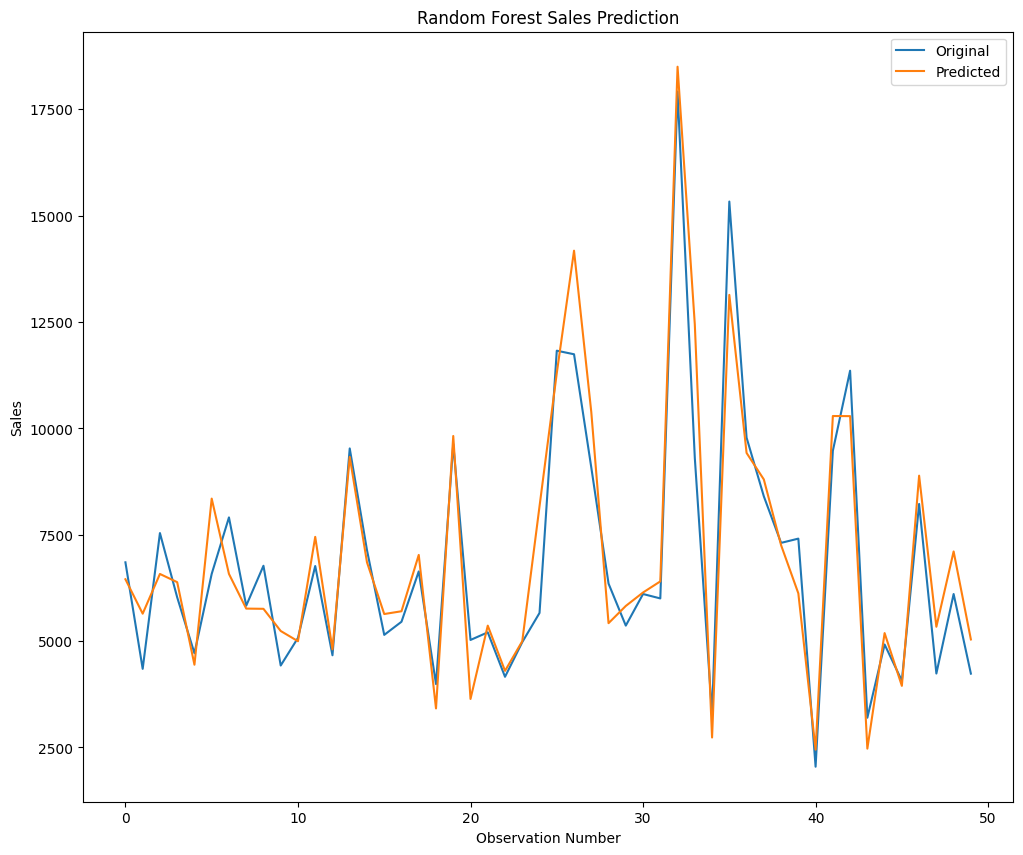

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import math
import matplotlib.pyplot as plt


# Train the model
random_forest_regressor_model = RandomForestRegressor()
random_forest_regressor_model.fit(x_train, y_train)

# Predictions
prediction_open = random_forest_regressor_model.predict(x_test)
prediction_closed = np.zeros(combined_data_subset_closed.shape[0])
prediction = np.append(prediction_open, prediction_closed)

# Append zeros to y_test_open
y_test = np.append(y_test_open, np.zeros(combined_data_subset_closed.shape[0]))

# Compute metrics
r2 = r2_score(y_test, prediction)
mae = mean_absolute_error(y_test, prediction)
rmse = math.sqrt(mean_squared_error(y_test, prediction))

# Store the performance metrics in the performance_df DataFrame
new_model_metrics = {
    'Model Name': 'Random Forest Regressor',
    'r2_Score': r2,
    'Mean Absolute Error': mae,
    'Root Mean Squared Error': rmse
}
performance_df.loc[1] = ['Random Forest Regression', r2, mae, rmse]

# Display the performance_df DataFrame
print(performance_df)

# Plotting actual vs predicted values
plt.figure(figsize=(12, 10))
plt.plot(range(len(y_test[:50])), y_test[:50], label="Original")
plt.plot(range(len(y_test[:50])), prediction[:50], label="Predicted")
plt.title("Random Forest Sales Prediction")
plt.ylabel("Sales")
plt.xlabel("Observation Number")
plt.legend()
plt.show()

### Model 3: Decision Tree Regressor

                 Model Name  r2_Score  Mean Absolute Error  \
0         Linear Regression  0.779313           989.491274   
1  Random Forest Regression  0.965230           359.196855   
2  Decision Tree Regression  0.950522           424.638136   
3  Decision Tree Regression  0.821814           910.968702   

  Root Mean Squared Error  
0             1926.085076  
1              764.523305  
2              911.587859  
3             1237.519566  


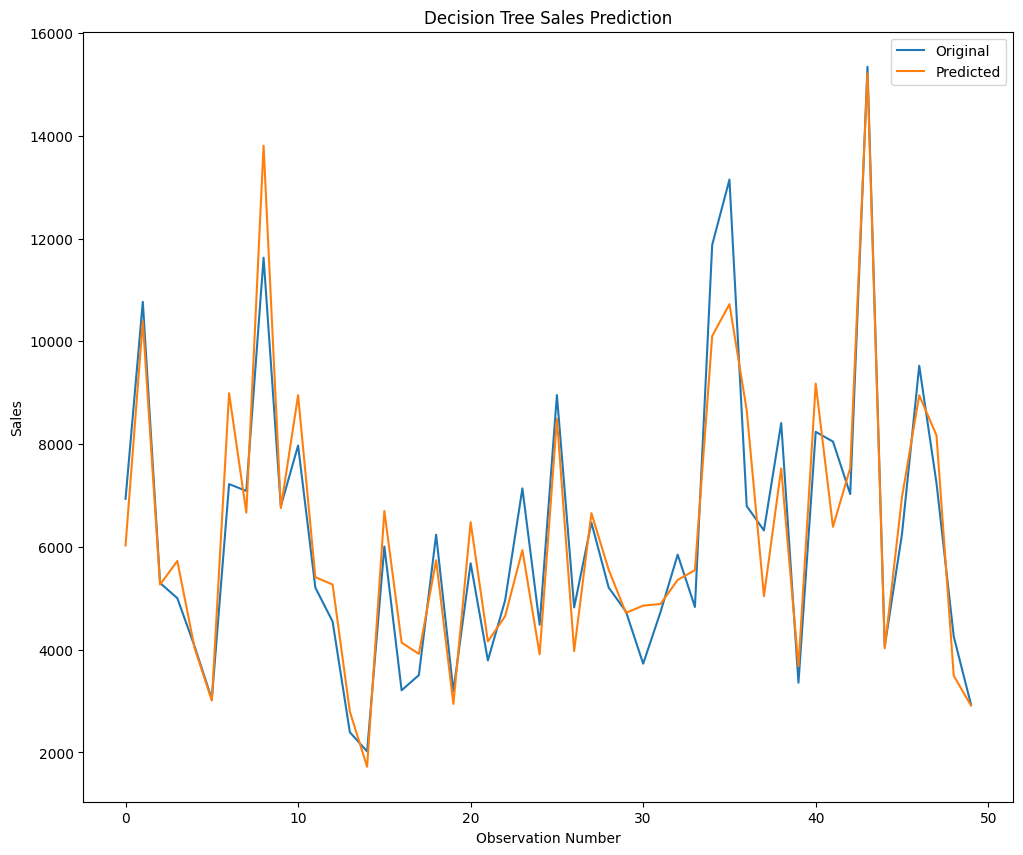

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import math
import matplotlib.pyplot as plt

# Train the model
decision_tree_regressor_model = DecisionTreeRegressor()
decision_tree_regressor_model.fit(x_train, y_train)

# Predictions
prediction_open = decision_tree_regressor_model.predict(x_test)
prediction_closed = np.zeros(combined_data_subset_closed.shape[0])
prediction = np.append(prediction_open, prediction_closed)

# Append zeros to y_test_open
y_test = np.append(y_test_open, np.zeros(combined_data_subset_closed.shape[0]))

# Compute metrics
r2 = r2_score(y_test, prediction)
mae = mean_absolute_error(y_test, prediction)
rmse = math.sqrt(mean_squared_error(y_test, prediction))

# Store the performance metrics in the performance_df DataFrame
new_model_metrics = {
    'Model Name': 'Decision Tree Regressor',
    'r2_Score': r2,
    'Mean Absolute Error': mae,
    'Root Mean Squared Error': rmse
}
performance_df.loc[2] = ['Decision Tree Regression', r2, mae, rmse]
# Display the performance_df DataFrame
print(performance_df)

# Plotting actual vs predicted values
plt.figure(figsize=(12, 10))
plt.plot(range(len(y_test[150:200])), y_test[150:200], label="Original")
plt.plot(range(len(y_test[150:200])), prediction[150:200], label="Predicted")
plt.title("Decision Tree Sales Prediction")
plt.ylabel("Sales")
plt.xlabel("Observation Number")
plt.legend()
plt.show()

# Model4: XGBoost


In [ ]:

combined_data_subset2=combined_data_subset.drop(['Customers','Open'],axis=1)
df_com_1 = combined_data_subset2.copy()



In [ ]:
length = len(df_com_1)
train_df = df_com_1[:int(length*0.7)]
val_df = df_com_1[int(length*0.7):int(length*0.9)]
test_df = df_com_1[int(length*0.9):]

In [ ]:
X_train, y_train = train_df.drop('Sales',axis =1), train_df['Sales']
X_val, y_val = val_df.drop('Sales', axis =1), val_df['Sales']
X_test, y_test = test_df.drop('Sales',axis = 1), test_df['Sales']
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((590967, 17), (590967,), (168848, 17), (168848,), (84424, 17), (84424,))

In [ ]:
import xgboost as xgb
reg = xgb.XGBRegressor(n_estimator = 40,early_stopping = 1000)
reg.fit(X_train,y_train, eval_set = [(X_train,y_train),(X_val,y_val)],  verbose =True)

[0]	validation_0-rmse:2879.75534	validation_1-rmse:2735.18637
[1]	validation_0-rmse:2734.55289	validation_1-rmse:2604.55568
[2]	validation_0-rmse:2644.22710	validation_1-rmse:2529.03233
[3]	validation_0-rmse:2588.31650	validation_1-rmse:2487.88442
[4]	validation_0-rmse:2530.54249	validation_1-rmse:2436.07819
[5]	validation_0-rmse:2491.60647	validation_1-rmse:2399.70031
[6]	validation_0-rmse:2468.11782	validation_1-rmse:2384.51724
[7]	validation_0-rmse:2382.20069	validation_1-rmse:2300.33731
[8]	validation_0-rmse:2365.40345	validation_1-rmse:2297.53457
[9]	validation_0-rmse:2314.03904	validation_1-rmse:2251.98402
[10]	validation_0-rmse:2261.14506	validation_1-rmse:2198.55543
[11]	validation_0-rmse:2246.14086	validation_1-rmse:2191.84846
[12]	validation_0-rmse:2201.32511	validation_1-rmse:2146.08428
[13]	validation_0-rmse:2180.79578	validation_1-rmse:2125.94461
[14]	validation_0-rmse:2170.33499	validation_1-rmse:2119.63035
[15]	validation_0-rmse:2141.77681	validation_1-rmse:2092.91813
[1

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping=1000,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimator=40,
             n_estimators=None, n_jobs=None, ...)

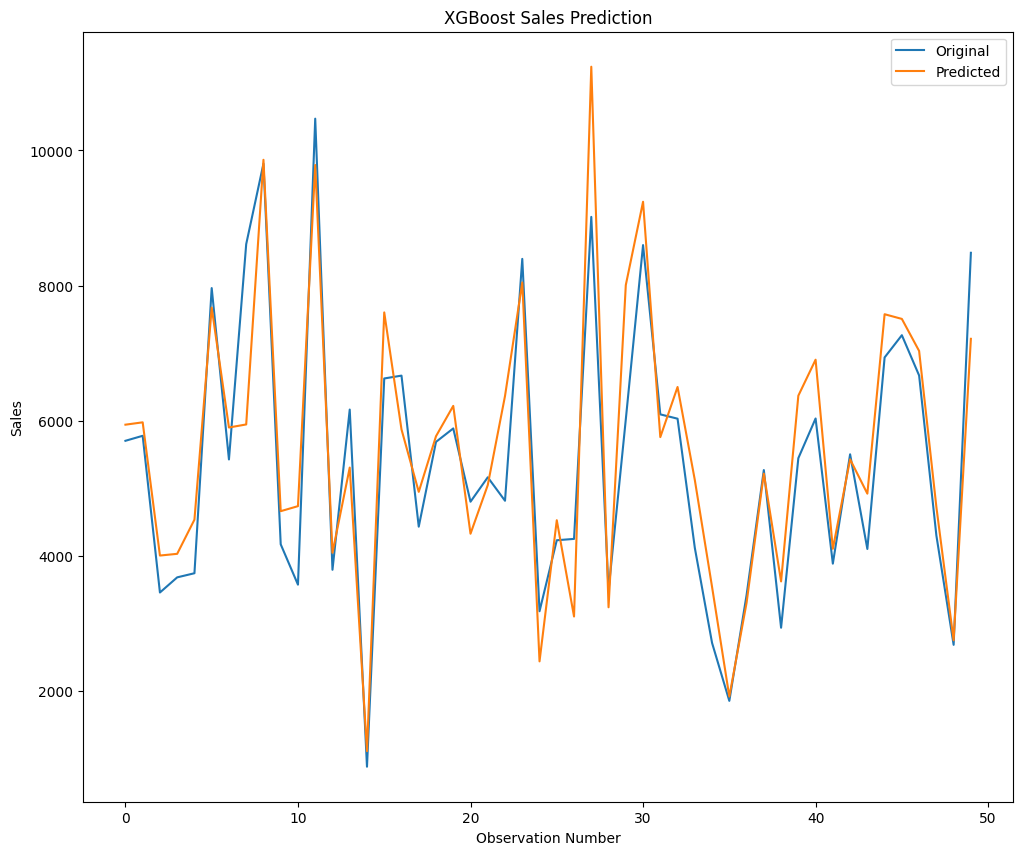

In [ ]:
pred = reg.predict(X_val)
plt.figure(figsize=(12, 10))
plt.plot(range(len(y_val[1000:1050])), y_val[1000:1050], label="Original")
plt.plot(range(len(y_val[1000:1050])), pred[1000:1050], label="Predicted")
plt.title("XGBoost Sales Prediction")
plt.ylabel("Sales")
plt.xlabel("Observation Number")
plt.legend()
plt.show()
pred_df_xg  = pd.DataFrame(data = {'Predictions':pred[1000:1050], 'Actual':y_val.values[1000:1050]})
# pred_df_xg.plot(alpha =0.4)

In [ ]:
pred_df_xg

Predictions  Actual
0    5943.414551    5705
1    5978.190430    5779
2    4007.664307    3461
3    4033.067383    3685
4    4538.547363    3746
5    7675.302734    7964
6    5901.634277    5429
7    5946.866211    8614
8    9861.609375    9804
9    4663.951172    4174
10   4738.378418    3577
11   9784.689453   10470
12   4048.818359    3797
13   5308.929199    6167
14   1113.804199     884
15   7603.925293    6627
16   5873.730469    6669
17   4949.807129    4435
18   5772.596191    5689
19   6221.336426    5888
20   4330.293457    4804
21   5050.161133    5165
22   6368.371094    4818
23   8047.270508    8396
24   2442.274658    3184
25   4530.150391    4234
26   3105.994873    4254
27  11238.244141    9017
28   3242.345215    3490
29   8008.126953    6021
30   9240.634766    8600
31   5759.554688    6096
32   6500.925781    6032
33   5125.732910    4122
34   3542.658203    2715
35   1921.627319    1858
36   3308.684326    3423
37   5219.284668    5272
38   3624.965088    2940
39   6372.096680    5448
40   6904.756348    6035
41   4107.213379    3888
42   5431.479980    5505
43   4923.232422    4105
44   7577.340820    6938
45   7507.920410    7267
46   7033.793457    6671
47   4726.506836    4305
48   2753.966309    2687
49   7213.416016    8486

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print(f'R2 Score of XGBoost is ---->{r2_score(y_val,pred)}')
print(f'Root Mean Squared Error of XGBoost is ----> {math.sqrt(mean_squared_error(y_val,pred))}')
print(f'MAE of XGBoost is ----> {mean_absolute_error(y_val,pred)}')
r2= r2_score(y_val,pred)
rmse=math.sqrt(mean_squared_error(y_val,pred))
mae=mean_absolute_error(y_val,pred)
performance_df.loc[3] = ['Decision Tree Regression', r2, mae, rmse]
# Display the performance_df DataFrame
print(performance_df)

R2 Score of XGBoost is ---->0.8218139448095008
Root Mean Squared Error of XGBoost is ----> 1237.5195662083079
MAE of XGBoost is ----> 910.9687024939516
                 Model Name  r2_Score  Mean Absolute Error  \
0         Linear Regression  0.779313           989.491274   
1  Random Forest Regression  0.965230           359.196855   
2  Decision Tree Regression  0.951245           424.554547   
3  Decision Tree Regression  0.821814           910.968702   

  Root Mean Squared Error  
0             1926.085076  
1              764.523305  
2              905.304777  
3             1237.519566  


# Neural Networks


In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/SalesForecasting/train.csv', low_memory=False, parse_dates=["Date"])

# Load the store dataset
df_store = pd.read_csv('/content/drive/MyDrive/SalesForecasting/store.csv')

# Merge the datasets on the 'Store' column using inner join
df_com = pd.merge(df_train, df_store, on='Store', how='inner')

In [ ]:
# Fill missing values in specific columns with 0 using the recommended approach
df_com['Promo2SinceWeek'] = df_com['Promo2SinceWeek'].fillna(0)
df_com['Promo2SinceYear'] = df_com['Promo2SinceYear'].fillna(0)
df_com['PromoInterval'] = df_com['PromoInterval'].fillna(0)

# Check for null values again after filling missing values
df_com.isnull().sum()

# Fill missing values in 'CompetitionDistance' column with 0 using the recommended approach
df_com['CompetitionDistance'] = df_com['CompetitionDistance'].fillna(0)

# Identify rows where 'CompetitionDistance' was filled with 0
filled_with_zero = df_com['CompetitionDistance'] == 0

# Fill corresponding rows in 'CompetitionOpenSinceMonth' and 'CompetitionOpenSinceYear' with 0
df_com.loc[filled_with_zero, 'CompetitionOpenSinceMonth'] = 0
df_com.loc[filled_with_zero, 'CompetitionOpenSinceYear'] = 0

# Check for null values again after filling missing values
df_com.isnull().sum()

# Fill missing values in 'CompetitionDistance' column with 0 using the recommended approach
df_com['CompetitionDistance'] = df_com['CompetitionDistance'].fillna(0)

# Identify rows where 'CompetitionDistance' was filled with 0
filled_with_zero = df_com['CompetitionDistance'] == 0

# Fill corresponding rows in 'CompetitionOpenSinceMonth' and 'CompetitionOpenSinceYear' with 0
df_com.loc[filled_with_zero, 'CompetitionOpenSinceMonth'] = 0
df_com.loc[filled_with_zero, 'CompetitionOpenSinceYear'] = 0

# Check for null values again after filling missing values
df_com.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance               0
CompetitionOpenSinceMonth    320706
CompetitionOpenSinceYear     320706
Promo2                            0
Promo2SinceWeek                   0
Promo2SinceYear                   0
PromoInterval                     0
dtype: int64

In [ ]:
# Fill missing values in 'CompetitionOpenSinceMonth' and 'CompetitionOpenSinceYear' with their respective modes using the recommended approach
df_com['CompetitionOpenSinceMonth'] = df_com['CompetitionOpenSinceMonth'].fillna(df_com['CompetitionOpenSinceMonth'].mode()[0])
df_com['CompetitionOpenSinceYear'] = df_com['CompetitionOpenSinceYear'].fillna(df_com['CompetitionOpenSinceYear'].mode()[0])

# Check for null values again after filling missing values
df_com.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [ ]:
# renaming values in the 'StateHoliday' column
# Renaming '0' (both string and integer type) as 'Non-Holiday'
df_com['StateHoliday'].replace(['0', 0], 'Non-Holiday', inplace=True)
# Renaming 'a' as 'Public-Holiday'
df_com['StateHoliday'].replace('a', 'Public-Holiday', inplace=True)
# Renaming 'b' as 'Easter-Holiday'
df_com['StateHoliday'].replace('b', 'Easter-Holiday', inplace=True)
# Renaming 'c' as 'Christmas-Holiday'
df_com['StateHoliday'].replace('c', 'Christmas-Holiday', inplace=True)
# Verifying the changes
state_holiday_updated_counts = df_com['StateHoliday'].value_counts(dropna=False)
state_holiday_updated_counts


StateHoliday
Non-Holiday          986159
Public-Holiday        20260
Easter-Holiday         6690
Christmas-Holiday      4100
Name: count, dtype: int64

In [ ]:
import pandas as pd

# Example list of sales value ranges
sales_ranges = [(0, 0), (1, 5000), (5001, 10000), (10001, 15000), (15001, 20000), (20001, 25000), (25001, 30000), (30001, 35000), (35001, float('inf'))]

# Initialize a list to store the counts of days for each sales range
no_of_days_per_range = []

# Loop through each sales range
for lower_bound, upper_bound in sales_ranges:
    # Count the number of days that have sales within the current range
    days_in_range = df_com[(df_com['Sales'] >= lower_bound) & (df_com['Sales'] <= upper_bound)].shape[0]
    no_of_days_per_range.append(days_in_range)

# Create a DataFrame to display the results
sales_days_df = pd.DataFrame({'Total Sales Count for the day': [f'{lower} to {upper}' for lower, upper in sales_ranges],
                              'No of such days': no_of_days_per_range})

# Display the DataFrame
sales_days_df

Total Sales Count for the day  No of such days
0                        0 to 0           172871
1                     1 to 5000           230240
2                 5001 to 10000           500465
3                10001 to 15000            93902
4                15001 to 20000            15632
5                20001 to 25000             3341
6                25001 to 30000              605
7                30001 to 35000              135
8                  35001 to inf               18

In [ ]:
df_com['Derived_DayName'] = df_com['Date'].dt.day_name()

# Grouping by the derived day name to get total sales for each day of the week
daily_sales_by_name = df_com.groupby('Derived_DayName')['Sales'].sum().reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]).reset_index()




In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode StoreType, Assortment, and Derived_DayName columns
df_com['StoreType'] = label_encoder.fit_transform(df_com['StoreType'])
df_com['Assortment'] = label_encoder.fit_transform(df_com['Assortment'])
df_com['Derived_DayName'] = label_encoder.fit_transform(df_com['Derived_DayName'])

# Map PromoInterval values to numeric codes, handling missing values
promo_interval_mapping = {
    "Jan,Apr,Jul,Oct": 1,
    "Feb,May,Aug,Nov": 2,
    "Mar,Jun,Sept,Dec": 3
}
df_com["PromoInterval"] = df_com["PromoInterval"].map(promo_interval_mapping).fillna(0)


# Encode the StateHoliday column
df_com['StateHoliday'] = label_encoder.fit_transform(df_com['StateHoliday'])

# Print the encoded_data DataFrame info
df_com.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 19 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  int64         
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  int64         
 10  Assortment                 1017209 non-null  int64         
 11  CompetitionDistance        1017209 no

In [ ]:
df_com2=df_com.copy()

In [ ]:
df_com2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 19 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  int64         
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  int64         
 10  Assortment                 1017209 non-null  int64         
 11  CompetitionDistance        1017209 no

In [ ]:
df_com.drop(df_com.loc[df_com['Sales'] > 30000].index,inplace=True)
df_com.drop('Open',axis = 1,inplace=True)
df_com.shape


(1017056, 18)

In [ ]:
df_com.set_index('Date',inplace=True)
df_com = df_com.sort_values(by = ['Store','Date'], ascending = [True,False])

In [ ]:
df_com.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1017056 entries, 2013-01-01 to 2015-07-31
Data columns (total 17 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017056 non-null  int64  
 1   DayOfWeek                  1017056 non-null  int64  
 2   Sales                      1017056 non-null  int64  
 3   Customers                  1017056 non-null  int64  
 4   Promo                      1017056 non-null  int64  
 5   StateHoliday               1017056 non-null  int64  
 6   SchoolHoliday              1017056 non-null  int64  
 7   StoreType                  1017056 non-null  int64  
 8   Assortment                 1017056 non-null  int64  
 9   CompetitionDistance        1017056 non-null  float64
 10  CompetitionOpenSinceMonth  1017056 non-null  float64
 11  CompetitionOpenSinceYear   1017056 non-null  float64
 12  Promo2                     1017056 non-null  int64  
 1

In [ ]:
from sklearn.model_selection import TimeSeriesSplit

In [ ]:
tss = TimeSeriesSplit(n_splits=2)

#Sort time frame by time and prepare features as data series
df_com.sort_index(inplace=True)
X = df_com.drop(labels=['Sales'], axis=1)
y = df_com['Sales']

In [ ]:
#Split Train and test data
for train_index, test_index in tss.split(X):
    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [ ]:
X.shape, X_train.shape, X_test.shape, y.shape, y_train.shape, y_test.shape

((1017056, 16), (678038, 16), (339018, 16), (1017056,), (678038,), (339018,))

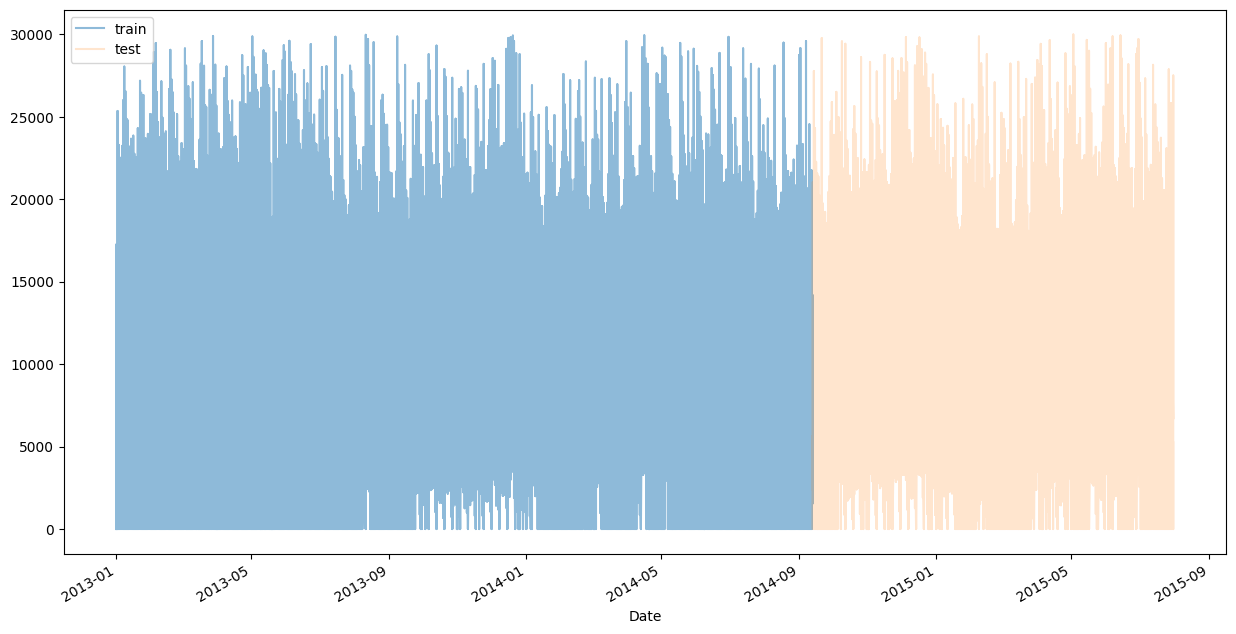

In [ ]:
plt.figure(figsize=(15,8))
ax = y_train.plot(alpha = 0.5)
y_test.plot(ax=ax, alpha = 0.2)
plt.legend(['train', 'test'])

In [ ]:
y_test = np.array(y_test).reshape(-1,1)
y_train = np.array(y_train).reshape(-1, 1)

# Model 5: ANN


In [ ]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import EarlyStopping

In [ ]:

y_test = np.array(y_test).reshape(-1,1)
y_train = np.array(y_train).reshape(-1, 1)

# Scale the data
scaler_x = MinMaxScaler(feature_range=(-1, 1))  # Initialize MinMaxScaler for features
scaler_y = MinMaxScaler(feature_range=(-1, 1))  # Initialize MinMaxScaler for target
X_train_sc = scaler_x.fit_transform(X_train)    # Scale the training features
y_train_sc = scaler_y.fit_transform(y_train)    # Scale the training target
X_test_sc = scaler_x.fit_transform(X_test)      # Scale the test features (Note: Separate scaler for test data)
y_test_sc = scaler_y.fit_transform(y_test)      # Scale the test target (Note: Separate scaler for test data)

# Build the model: Simple Neural Network
model = keras.Sequential()                     # Initialize sequential model
model.add(Dense(12, input_dim=X_train_sc.shape[1], activation='relu'))  # Add input layer with 12 neurons and ReLU activation function
model.add(Dense(1))                            # Add output layer with 1 neuron for regression
model.compile(loss='mean_squared_error', optimizer='adam')  # Compile the model with mean squared error loss function and Adam optimizer

# Set seed for reproducibility
np.random.seed(455)

# Define early stopping callback
early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)  # Stop training when loss stops decreasing after 2 epochs

# Subset the data for training and testing
subset_percentage = 0.01                         # Define the percentage of data to include in the subset
# num_samples = int(subset_percentage * len(X_train_sc))    # Calculate the number of samples to include in the subset
# num_samples_test = 41088                          # Specify the number of samples to include in the test subset
num_samples= 41088
num_samples_test = int(subset_percentage * len(X_test_sc))
X_train_subset = X_train_sc[:num_samples, :]     # Create subset of training features
y_train_subset = y_train_sc[:num_samples]         # Create subset of training target
X_test_subset = X_test_sc[:num_samples_test, :]  # Create subset of test features
y_test_subset = y_test_sc[:num_samples_test]      # Create subset of test target

In [ ]:
y_test = np.array(y_test).reshape(-1,1)
y_train = np.array(y_train).reshape(-1, 1)

# Scale the data
scaler_x = MinMaxScaler(feature_range=(-1, 1))  # Initialize MinMaxScaler for features
scaler_y = MinMaxScaler(feature_range=(-1, 1))  # Initialize MinMaxScaler for target
X_train_sc = scaler_x.fit_transform(X_train)    # Scale the training features
y_train_sc = scaler_y.fit_transform(y_train)    # Scale the training target
X_test_sc = scaler_x.fit_transform(X_test)      # Scale the test features (Note: Separate scaler for test data)
y_test_sc = scaler_y.fit_transform(y_test)      # Scale the test target (Note: Separate scaler for test data)

# Build the model: Simple Neural Network
model = keras.Sequential()                     # Initialize sequential model
model.add(Dense(64, input_dim=X_train_sc.shape[1], activation='relu'))
model.add(Dense(32,activation ='relu'))
model.add(Dense(16,activation= 'relu'))# Add input layer with 12 neurons and ReLU activation function
model.add(Dense(1))                            # Add output layer with 1 neuron for regression
model.compile(loss='mean_squared_error', optimizer='adam')  # Compile the model with mean squared error loss function and Adam optimizer

# Set seed for reproducibility
np.random.seed(455)

# Define early stopping callback
early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)  # Stop training when loss stops decreasing after 2 epochs

# Subset the data for training and testing
subset_percentage = 0.1                         # Define the percentage of data to include in the subset
num_samples = int(subset_percentage * len(X_train_sc))    # Calculate the number of samples to include in the subset
num_samples_test = 41088                          # Specify the number of samples to include in the test subset
X_train_subset = X_train_sc[:num_samples, :]     # Create subset of training features
y_train_subset = y_train_sc[:num_samples]         # Create subset of training target
X_test_subset = X_test_sc[:num_samples_test, :]  # Create subset of test features
y_test_subset = y_test_sc[:num_samples_test]      # Create subset of test target

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 64)                1088      
                                                                 
 dense_14 (Dense)            (None, 32)                2080      
                                                                 
 dense_15 (Dense)            (None, 16)                528       
                                                                 
 dense_16 (Dense)            (None, 1)                 17        
                                                                 
Total params: 3713 (14.50 KB)
Trainable params: 3713 (14.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(X_train_subset,            # Subset of training features
                    y_train_subset,            # Subset of training target
                    epochs=20,                 # Number of epochs
                    batch_size=10,              # Batch size
                    verbose=1,                 # Verbosity mode (0: silent, 1: progress bar, 2: one line per epoch)
                    callbacks=[early_stop],    # Early stopping callback
                    shuffle=False)             # Shuffle data before each epoch (set to False for time series data)

Epoch 1/20
6781/6781 [==============================] - 25s 4ms/step - loss: 0.0030
Epoch 2/20
6781/6781 [==============================] - 17s 2ms/step - loss: 0.0028
Epoch 3/20
6781/6781 [==============================] - 18s 3ms/step - loss: 0.0027
Epoch 4/20
6781/6781 [==============================] - 18s 3ms/step - loss: 0.0026
Epoch 5/20
6781/6781 [==============================] - 15s 2ms/step - loss: 0.0025
Epoch 6/20
6781/6781 [==============================] - 17s 2ms/step - loss: 0.0025
Epoch 7/20
6781/6781 [==============================] - 18s 3ms/step - loss: 0.0024
Epoch 8/20
6781/6781 [==============================] - 16s 2ms/step - loss: 0.0023
Epoch 9/20
6781/6781 [==============================] - 16s 2ms/step - loss: 0.0023
Epoch 10/20
6781/6781 [==============================] - 15s 2ms/step - loss: 0.0023
Epoch 11/20
6781/6781 [==============================] - 15s 2ms/step - loss: 0.0022
Epoch 12/20
6781/6781 [==============================] - 16s 2ms/step - lo

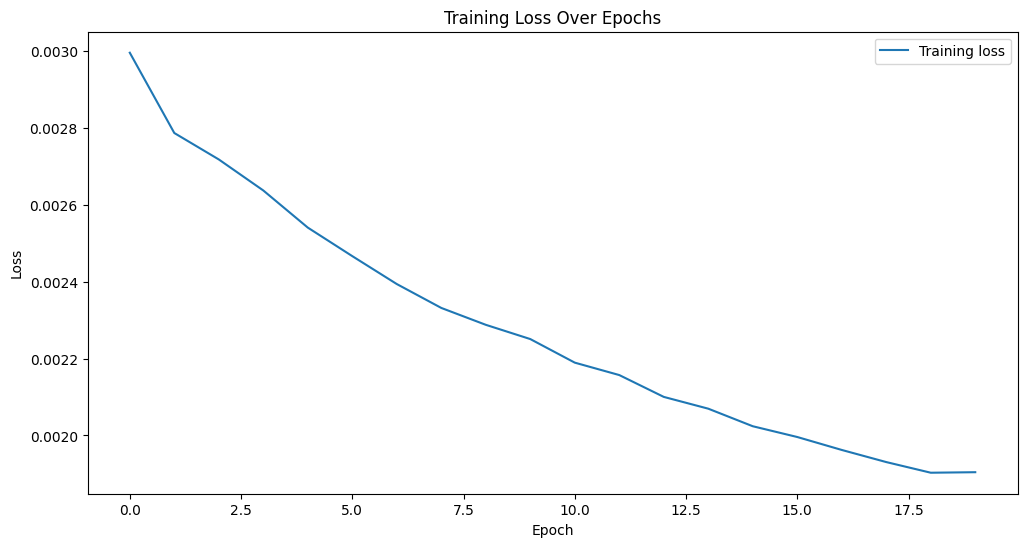

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training loss')
# plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math
y_pred = model.predict(X_test_subset)
y_pred_unscaled = scaler_y.inverse_transform(y_pred)
y_test_unscaled = scaler_y.inverse_transform(y_test_subset)
mae = mean_absolute_error(y_test_unscaled, y_pred_unscaled)
rmse =math.sqrt( mean_squared_error(y_test_unscaled, y_pred_unscaled))

print('MAE:', mae)
print('RMSE:', rmse)


1284/1284 [==============================] - 3s 2ms/step
MAE: 2949.6437188874047
RMSE: 3578.316742329536


In [ ]:
# Predict using the trained model
y_pred_test_nn = model.predict(X_test_subset)    # Predictions on test subset
y_train_pred_nn = model.predict(X_train_subset)  # Predictions on train subset

# Calculate R2 scores
r2_train = r2_score(y_train_subset, y_train_pred_nn)  # R2 score on train set
r2_test = r2_score(y_test_subset, y_pred_test_nn)      # R2 score on test set

# Print the R2 scores
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_train))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_test))


2119/2119 [==============================] - 5s 2ms/step
The R2 score on the Train set is:	0.951
The R2 score on the Test set is:	0.068


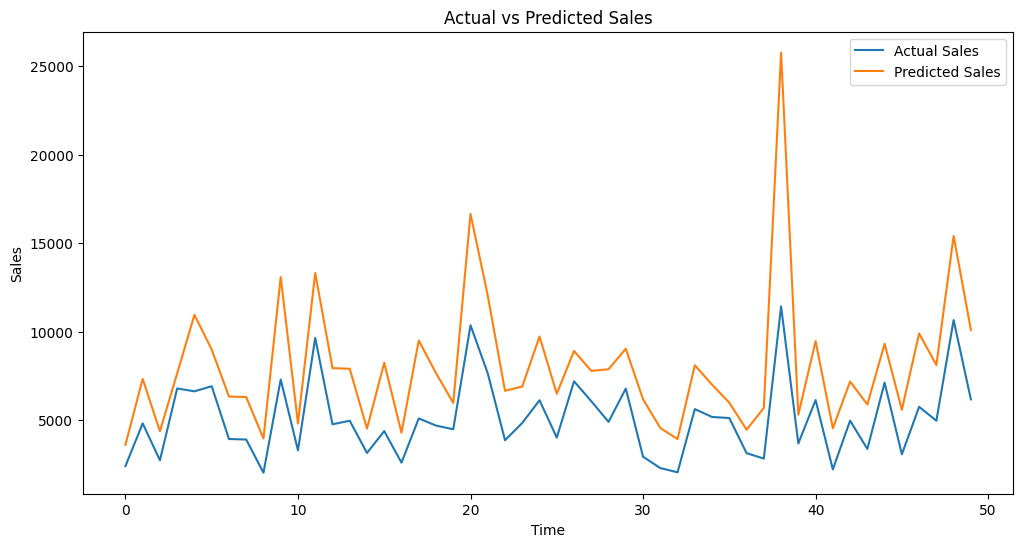

In [ ]:

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(y_test_unscaled[:50], label='Actual Sales')
plt.plot(y_pred_unscaled[:50], label='Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.show()


# Model 6: LSTM

In [ ]:

# Subset the data for training and testing
subset_percentage = 0.01                         # Define the percentage of data to include in the subset
# num_samples = int(subset_percentage * len(X_train_sc))    # Calculate the number of samples to include in the subset
# num_samples_test = 41088                          # Specify the number of samples to include in the test subset
num_samples= 41088
num_samples_test = int(subset_percentage * len(X_test_sc))
X_train_subset = X_train_sc[:num_samples, :]     # Create subset of training features
y_train_subset = y_train_sc[:num_samples]         # Create subset of training target
X_test_subset = X_test_sc[:num_samples_test, :]  # Create subset of test features
y_test_subset = y_test_sc[:num_samples_test]      # Create subset of test target

# Reshape the data for LSTM
X_train_subset = X_train_subset.reshape((X_train_subset.shape[0], 1, X_train_subset.shape[1]))
X_test_subset = X_test_subset.reshape((X_test_subset.shape[0], 1, X_test_subset.shape[1]))

# Define and fit the LSTM model
model_lstm = keras.Sequential()
model_lstm.add(LSTM(units=50, input_shape=(X_train_subset.shape[1], X_train_subset.shape[2]), activation='relu'))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
model_lstm.fit(X_train_subset, y_train_subset, epochs=10, batch_size=10, verbose=1, callbacks=[early_stop],shuffle = False)

# Predict sales using the LSTM model
y_pred_lstm = model_lstm.predict(X_test_subset)


Epoch 1/10
4109/4109 [==============================] - 14s 3ms/step - loss: 0.0183
Epoch 2/10
4109/4109 [==============================] - 14s 3ms/step - loss: 0.0064
Epoch 3/10
4109/4109 [==============================] - 12s 3ms/step - loss: 0.0053
Epoch 4/10
4109/4109 [==============================] - 13s 3ms/step - loss: 0.0048
Epoch 5/10
4109/4109 [==============================] - 13s 3ms/step - loss: 0.0045
Epoch 6/10
4109/4109 [==============================] - 13s 3ms/step - loss: 0.0043
Epoch 7/10
4109/4109 [==============================] - 13s 3ms/step - loss: 0.0042
Epoch 8/10
4109/4109 [==============================] - 14s 3ms/step - loss: 0.0041
Epoch 9/10
4109/4109 [==============================] - 13s 3ms/step - loss: 0.0040
Epoch 10/10
106/106 [==============================] - 0s 2ms/step


MAE: 3026.8560635113786
RMSE: 3735.379231027753
R2 Score: 0.28834874061222104


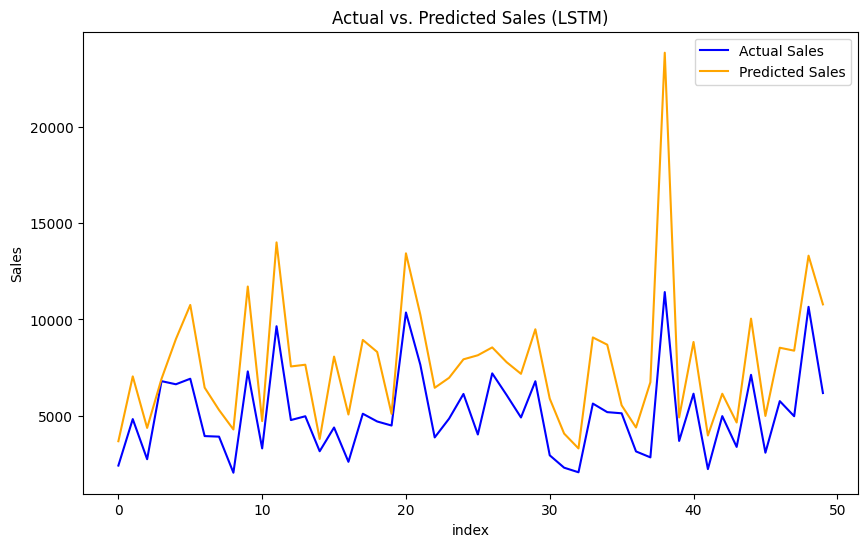

In [ ]:

# y_pred_lstm = model_lstm.predict(X_test_subset)
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt
# Inverse transform predictions and test data
y_pred_lstm_unscaled = scaler_y.inverse_transform(y_pred_lstm)
y_test_unscaled = scaler_y.inverse_transform(y_test_subset)

# Calculate evaluation metrics
mae_lstm = mean_absolute_error(y_test_unscaled, y_pred_lstm_unscaled)
rmse_lstm = math.sqrt(mean_squared_error(y_test_unscaled, y_pred_lstm_unscaled))
r2_lstm = r2_score(y_test_unscaled, y_pred_lstm_unscaled)

# Print evaluation metrics
print("MAE:", mae_lstm)
print("RMSE:", rmse_lstm)
print("R2 Score:", r2_lstm)

# Plot the first 50 values of predicted and actual sales
plt.figure(figsize=(10, 6))
plt.plot(y_test_unscaled[:50], label="Actual Sales", color="blue")
plt.plot(y_pred_lstm_unscaled[:50], label="Predicted Sales", color="orange")
plt.title("Actual vs. Predicted Sales (LSTM)")
plt.xlabel("index")
plt.ylabel("Sales")
plt.legend()
plt.show()


In [ ]:
# Predict using the trained model
y_pred_test_rnn = model_lstm.predict(X_test_subset)    # Predictions on test subset
y_train_pred_rnn = model_lstm.predict(X_train_subset)  # Predictions on train subset

# Calculate R2 scores
r2_train = r2_score(y_train_subset, y_train_pred_rnn)  # R2 score on train set
r2_test = r2_score(y_test_subset, y_pred_test_rnn)      # R2 score on test set

# Print the R2 scores
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_train))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_test))


1284/1284 [==============================] - 2s 2ms/step
The R2 score on the Train set is:	0.918
The R2 score on the Test set is:	0.288


106/106 [==============================] - 1s 4ms/step


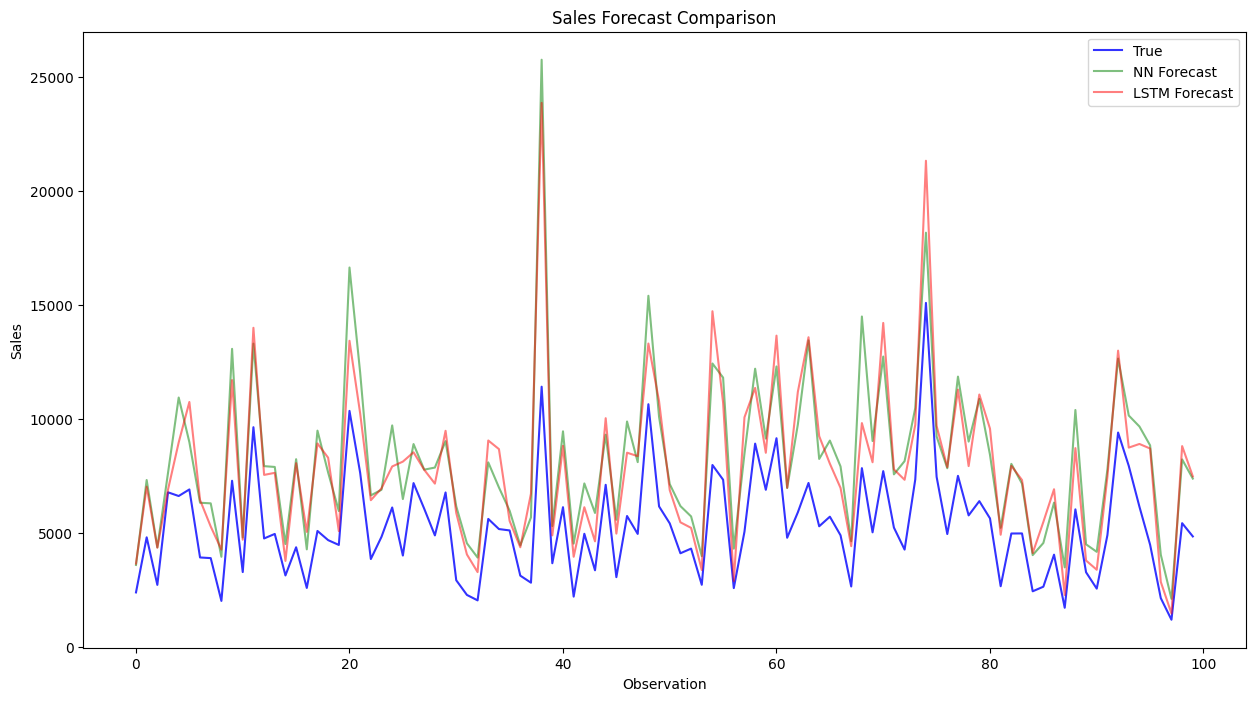

In [ ]:
# Forecasting using the simple neural network (NN) model
nn_y_pred_test = model.predict(X_test_subset)

# Forecasting using the trained LSTM model


# Inverse transform the scaled predictions to the original scale
y_pred_original_scale_nn = scaler_y.inverse_transform(y_pred_test_nn)
y_pred_original_scale_lstm = scaler_y.inverse_transform(y_pred_lstm)
y_test_subset_original = scaler_y.inverse_transform(y_test_subset)

# Plotting the forecasts
plt.figure(figsize=(15, 8))
plt.plot(y_test_subset_original[:100], label='True', alpha=0.8, color='blue')                     # True sales values
plt.plot(y_pred_original_scale_nn[:100], label='NN Forecast',alpha=0.5,color='green')   # Forecast using NN model
plt.plot(y_pred_original_scale_lstm[:100], label='LSTM Forecast', alpha=0.5,color='red')  # Forecast using LSTM model
plt.title("Sales Forecast Comparison")
plt.xlabel('Observation')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Machine Learning Models on 1 Store

In [ ]:
store_1 = df_com2[df_com2['Store']==1]
store_1.set_index('Date',inplace = True)

In [ ]:
df_st1 = store_1[['DayOfWeek','Sales','Promo','StateHoliday','Open','SchoolHoliday']]
df_st1.sort_values(by = 'Date',inplace = True)
# df_st1.set_index('Date',inplace = True)

In [ ]:
def rmspe(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred)) / np.mean(y_true)

In [ ]:
df_st1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 942 entries, 2013-01-01 to 2015-07-31
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   DayOfWeek      942 non-null    int64
 1   Sales          942 non-null    int64
 2   Promo          942 non-null    int64
 3   StateHoliday   942 non-null    int64
 4   Open           942 non-null    int64
 5   SchoolHoliday  942 non-null    int64
dtypes: int64(6)
memory usage: 51.5 KB


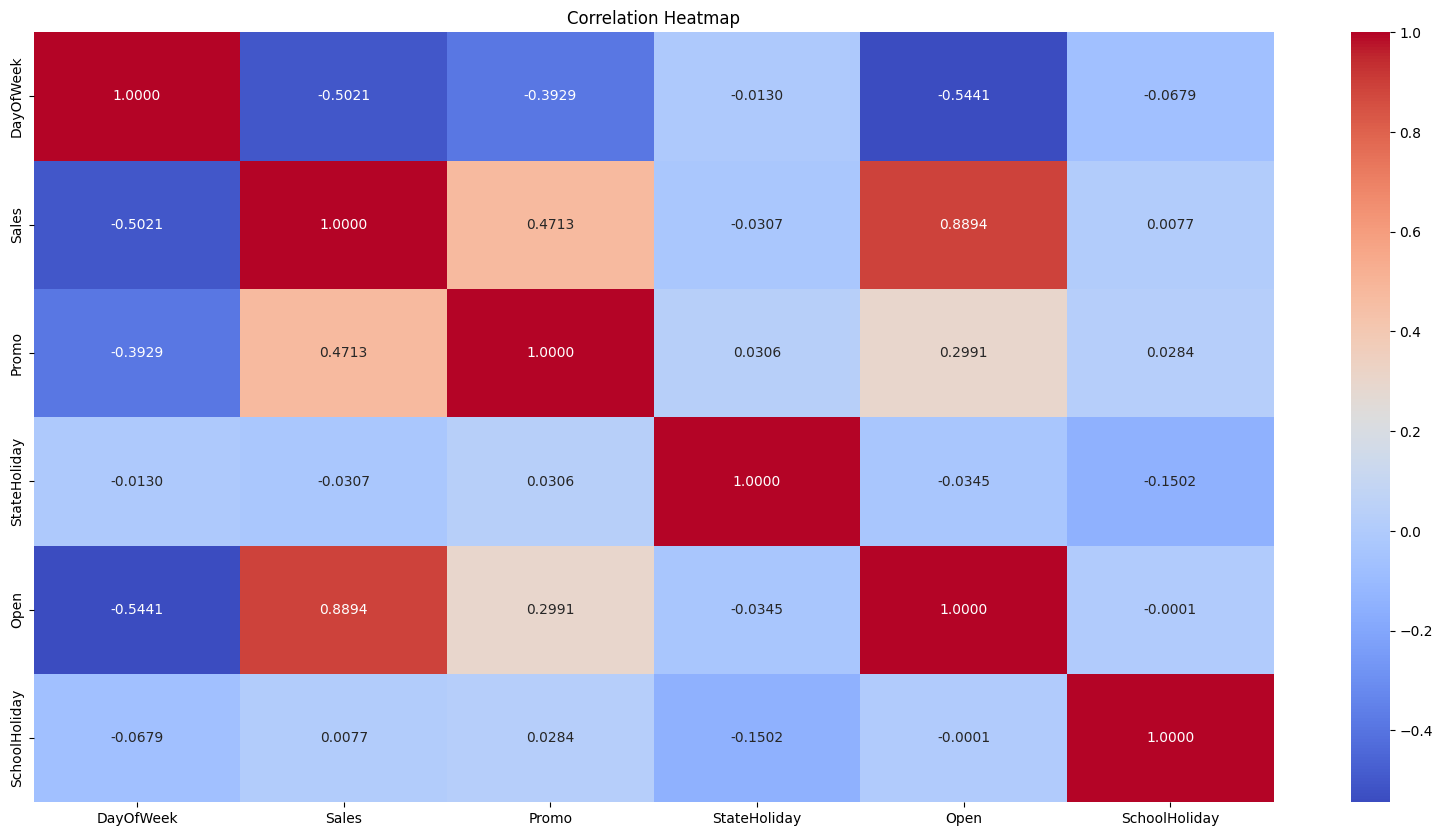

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(df_st1.corr(), annot=True, cmap='coolwarm', fmt='.4f')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
train_size = int(len(df_st1) * 0.8)
train_data = df_st1[:train_size].copy(deep=True)
test_data = df_st1[train_size:].copy(deep=True)

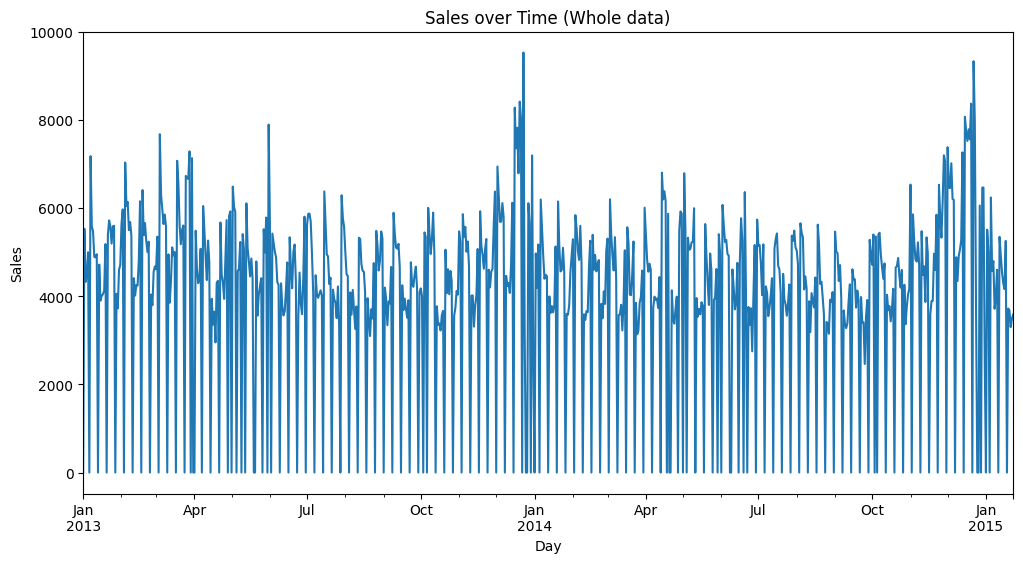

In [ ]:
plt.figure(figsize=(12, 6))
train_data['Sales'].plot()
plt.xlabel('Day')
plt.ylabel('Sales')
plt.title('Sales over Time (Whole data)')
plt.show()

In [ ]:
train_data['year'] = train_data.index.year
train_data['month'] = train_data.index.month
train_data['day'] = train_data.index.day

# Convert the columns to integers
train_data['year'] = train_data['year'].astype(int)
train_data['month'] = train_data['month'].astype(int)
train_data['day'] = train_data['day'].astype(int)


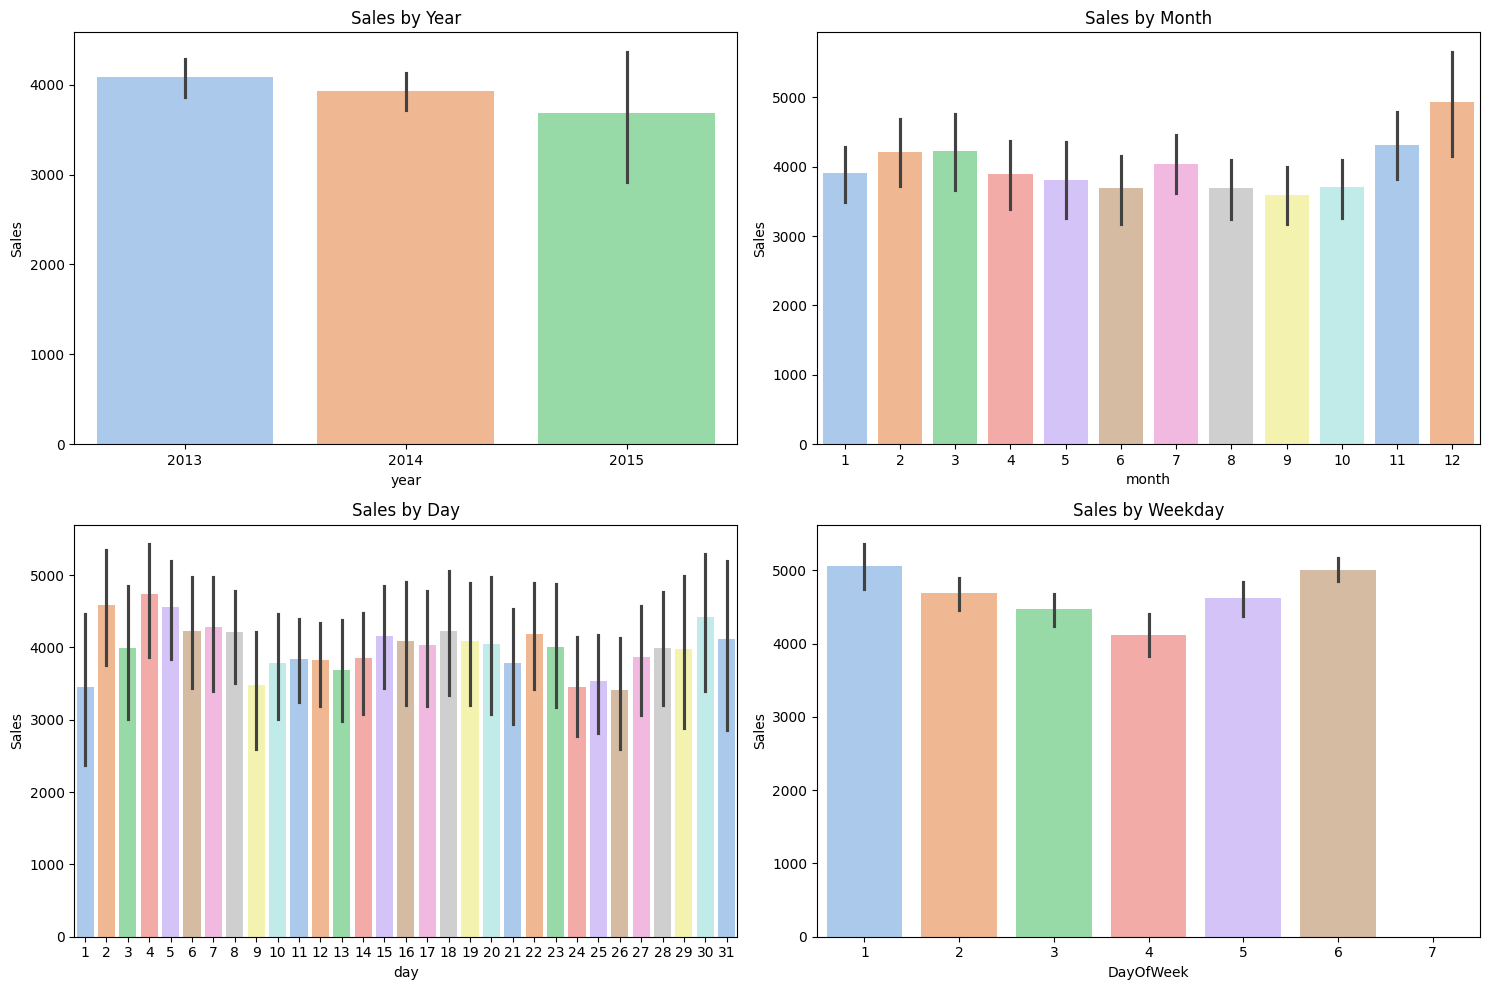

In [ ]:

palette = "pastel"

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.barplot(x='year',y="Sales", data=train_data, ax=axes[0, 0], palette=palette)
sns.barplot(x='month',y="Sales", data=train_data, ax=axes[0, 1], palette=palette)
sns.barplot(x='day',y="Sales", data=train_data, ax=axes[1, 0], palette=palette)
sns.barplot(x='DayOfWeek',y="Sales", data=train_data, ax=axes[1, 1], palette=palette)


# Set the titles for each chart
axes[0, 0].set_title('Sales by Year')
axes[0, 1].set_title('Sales by Month')
axes[1, 0].set_title('Sales by Day')
axes[1, 1].set_title('Sales by Weekday')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the grid of bar charts
plt.show()



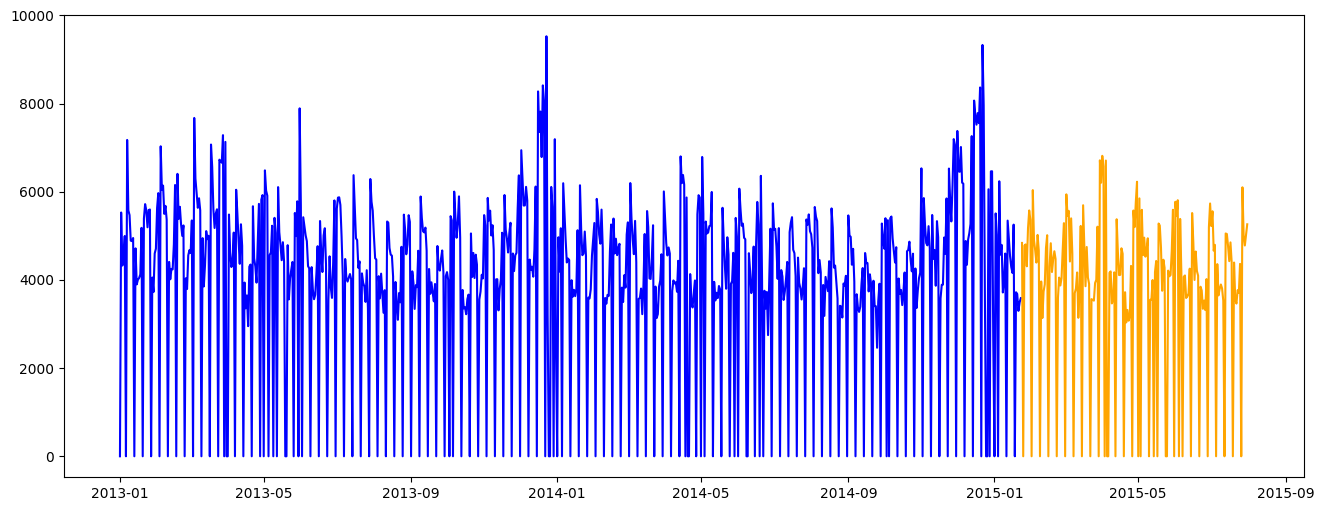

In [ ]:
fig ,axes =plt.subplots(1,1)
fig.set_figheight(6)
fig.set_figwidth(16)

axes.plot(train_data["Sales"], label='Train',color='blue')
axes.plot(test_data["Sales"], label='Test',color='orange')
plt.show()

# Prophet

In [ ]:
def prepare_df_prophet(df, Type="train"):
    new_df = df.copy(deep=True)
    new_df.drop(["StateHoliday"], inplace=True, axis=1)
    new_df['day'] = new_df.index.day.astype(int)
    new_df['month'] = new_df.index.month.astype(int)
    new_df['year'] = new_df.index.year.astype(int)
    new_df['DayOfYear'] = new_df.index.dayofyear.astype(int)
    new_df['WeekOfYear'] = new_df.index.isocalendar().week.astype(int)
    new_df = new_df.reset_index()
    new_df.rename({"Sales": "y", "Date" : "ds"},axis=1, inplace = True)
    if Type == "test":
        new_df.drop("y", axis=1, inplace=True)
    return new_df

In [ ]:
train_prophet = prepare_df_prophet(train_data)

In [ ]:
from prophet import Prophet
Prophet_model = Prophet()

regressors = ['DayOfWeek', 'Promo', 'SchoolHoliday', 'day','Open',
              'month', 'year', 'DayOfYear', 'WeekOfYear']

for regressor in regressors:
    Prophet_model.add_regressor(regressor)

In [ ]:
Prophet_model.fit(train_prophet)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_8l5o_ta/4ttycckz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_8l5o_ta/iq3rk7hz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41769', 'data', 'file=/tmp/tmp_8l5o_ta/4ttycckz.json', 'init=/tmp/tmp_8l5o_ta/iq3rk7hz.json', 'output', 'file=/tmp/tmp_8l5o_ta/prophet_modelub3anbx6/prophet_model-20240501101052.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:10:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:10:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
test_prophet = prepare_df_prophet(test_data, Type="test")
forecast = Prophet_model.predict(test_prophet)
prophet_preds = forecast.copy(deep=True)
prophet_preds = prophet_preds.set_index("ds")["yhat"].clip(lower=0)

In [ ]:
prophet_preds[test_data["Open"] == 0] = 0

In [ ]:


from sklearn.metrics import r2_score, mean_absolute_error

y_true = test_data["Sales"]
y_pred = prophet_preds

r2_score_prophet = r2_score(y_true, y_pred)
mae_score_prophet = mean_absolute_error(y_true, y_pred)

print("R2 Score of Prophet Model:", r2_score_prophet)
print("MAE Score of Prophet Model:", mae_score_prophet)


R2 Score of Prophet Model: 0.9131142786482283
MAE Score of Prophet Model: 403.25712190065735


In [ ]:
print(f'RMSPE for Prophet on Test:{math.sqrt(mean_squared_error(prophet_preds,test_data["Sales"]))}')

RMSPE for Prophet on Test:552.8907013266074


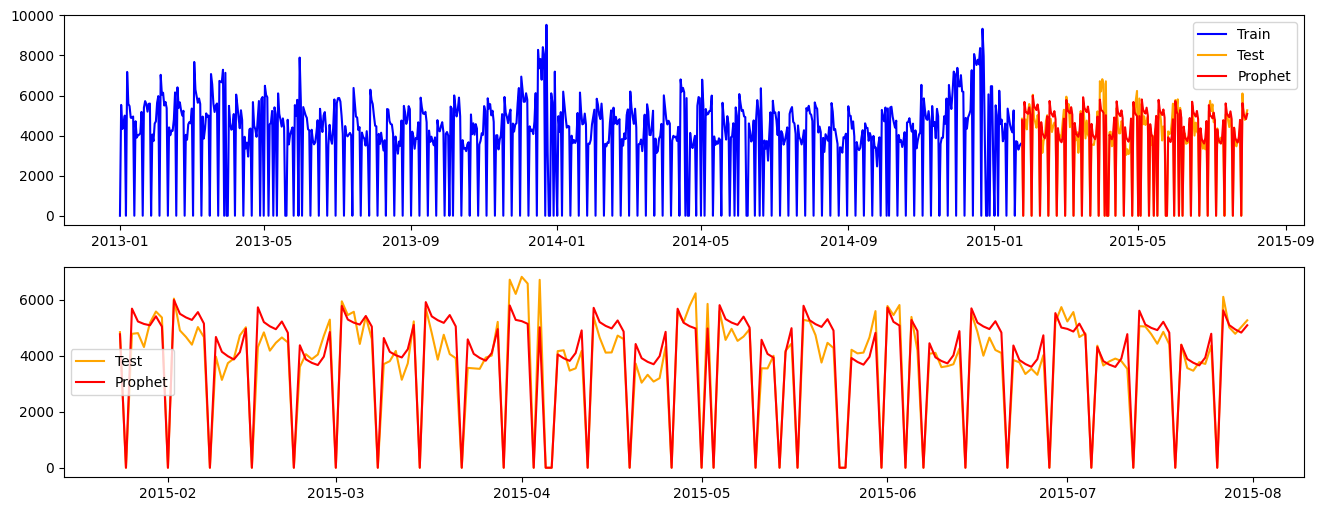

In [ ]:
fig ,axes =plt.subplots(2,1)
fig.set_figheight(6)
fig.set_figwidth(16)

axes[0].plot(train_data["Sales"], label='Train',color='blue')
axes[0].plot(test_data["Sales"], label='Test',color='orange')

axes[0].plot(prophet_preds,label="Prophet",color='red')
axes[0].legend(loc='best')

axes[1].plot(test_data["Sales"], label='Test',color='orange')
axes[1].plot(prophet_preds,label="Prophet",color='red')
axes[1].legend(loc='best')
plt.show()

In [ ]:
from tqdm import tqdm
from sklearn.model_selection import ParameterGrid

In [ ]:
regressors = ['DayOfWeek', 'Promo', 'SchoolHoliday', 'day','Open',
              'month', 'year', 'DayOfYear', 'WeekOfYear']

train_prophet = prepare_df_prophet(train_data)

test_prophet = prepare_df_prophet(test_data, Type="test")

# Define the parameter grid
param_grid = {
    'changepoint_prior_scale':[0.1,0.2,0.3,0.4,0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0],
    'holidays_prior_scale':[0.1,0.2,0.3,0.4,0.5],
    'changepoint_range': [0.8, 0.9, 1.0],
}
best_model = None
best_param = None
best_rmspe = float('inf')

# Iterate over all combinations of parameters
for params in tqdm(ParameterGrid(param_grid)):
    # Create a new Prophet model with the specified parameters
    model = Prophet(**params)

    # Add regressors to the model
    for regressor in regressors:
        model.add_regressor(regressor)

    # Fit the model to the training data
    model.fit(train_prophet)

    # Make predictions on the test data
    forecast = model.predict(test_prophet)
    prophet_preds = forecast.set_index("ds")["yhat"].clip(lower=0)
#     prophet_preds[test_data["Open"] == 0] = 0

    # Calculate RMSPE
    rmspe_score = rmspe(prophet_preds, test_data["Sales"])
    # Check if the current model is the best so far
    if rmspe_score < best_rmspe:
        best_rmspe = rmspe_score
        print(f"  Found new best RMSPE: {best_rmspe}")
        best_model = model
        best_param = params

# Print the RMSPE of the best model
print(f"Best RMSPE: {best_rmspe}")
print(f"Best Params: {best_param}")

  0%|          | 0/225 [00:00<?, ?it/s]INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_8l5o_ta/w_273m6l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_8l5o_ta/cftvvy3x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30766', 'data', 'file=/tmp/tmp_8l5o_ta/w_273m6l.json', 'init=/tmp/tmp_8l5o_ta/cftvvy3x.json', 'output', 'file=/tmp/tmp_8l5o_ta/prophet_model5odbi34u/prophet_model-20240501101311.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:13:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:13:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
  0%|          | 1/225 [00:00<02:18,  1.61it/s]INFO:prophet:Disabling daily seasonality. Run prophet wi

  Found new best RMSPE: 0.153882621020047


10:13:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
  1%|          | 2/225 [00:00<01:42,  2.17it/s]INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_8l5o_ta/z68tecx5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_8l5o_ta/m1ivw4ow.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89767', 'data', 'file=/tmp/tmp_8l5o_ta/z68tecx5.json', 'init=/tmp/tmp_8l5o_ta/m1ivw4ow.json', 'output', 'file=/tmp/tmp_8l5o_ta/prophet_model2pdy7wzz/prophet_model-20240501101312.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:13:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


  Found new best RMSPE: 0.14205060879877524


10:13:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
  1%|▏         | 3/225 [00:01<01:38,  2.26it/s]INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_8l5o_ta/ldaay5re.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_8l5o_ta/4i9sm0aj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33845', 'data', 'file=/tmp/tmp_8l5o_ta/ldaay5re.json', 'init=/tmp/tmp_8l5o_ta/4i9sm0aj.json', 'output', 'file=/tmp/tmp_8l5o_ta/prophet_modelrjomnfjk/prophet_model-20240501101313.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:13:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:13:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processin

  Found new best RMSPE: 0.1419445408496543


10:13:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
  4%|▍         | 9/225 [00:03<01:21,  2.66it/s]INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_8l5o_ta/vshc1rat.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_8l5o_ta/oo3kmh33.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=146', 'data', 'file=/tmp/tmp_8l5o_ta/vshc1rat.json', 'init=/tmp/tmp_8l5o_ta/oo3kmh33.json', 'output', 'file=/tmp/tmp_8l5o_ta/prophet_model9qdc992g/prophet_model-20240501101315.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:13:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


  Found new best RMSPE: 0.14189009441524916


10:13:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
  4%|▍         | 10/225 [00:04<01:22,  2.62it/s]INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_8l5o_ta/8bsbgrsj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_8l5o_ta/dofhvp3z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79596', 'data', 'file=/tmp/tmp_8l5o_ta/8bsbgrsj.json', 'init=/tmp/tmp_8l5o_ta/dofhvp3z.json', 'output', 'file=/tmp/tmp_8l5o_ta/prophet_model8hozet72/prophet_model-20240501101315.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:13:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:13:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processi

  Found new best RMSPE: 0.14181032034582927


10:13:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
  5%|▌         | 12/225 [00:04<01:17,  2.74it/s]INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_8l5o_ta/vi3suiyo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_8l5o_ta/lv0ao_od.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26209', 'data', 'file=/tmp/tmp_8l5o_ta/vi3suiyo.json', 'init=/tmp/tmp_8l5o_ta/lv0ao_od.json', 'output', 'file=/tmp/tmp_8l5o_ta/prophet_modeltbl5uw9h/prophet_model-20240501101316.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:13:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


  Found new best RMSPE: 0.14167000887867892


10:13:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
  6%|▌         | 13/225 [00:05<01:26,  2.46it/s]INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_8l5o_ta/zirspcwn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_8l5o_ta/gyz6eo3f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19897', 'data', 'file=/tmp/tmp_8l5o_ta/zirspcwn.json', 'init=/tmp/tmp_8l5o_ta/gyz6eo3f.json', 'output', 'file=/tmp/tmp_8l5o_ta/prophet_model4g_2m_eb/prophet_model-20240501101317.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:13:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:13:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processi

  Found new best RMSPE: 0.13927341226904769


10:14:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
 61%|██████▏   | 138/225 [01:04<00:39,  2.21it/s]INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_8l5o_ta/4_aze1og.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_8l5o_ta/vourm8k7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20039', 'data', 'file=/tmp/tmp_8l5o_ta/4_aze1og.json', 'init=/tmp/tmp_8l5o_ta/vourm8k7.json', 'output', 'file=/tmp/tmp_8l5o_ta/prophet_model0uctis64/prophet_model-20240501101416.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:14:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:14:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done process

  Found new best RMSPE: 0.13909966009600983


10:14:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
 84%|████████▍ | 189/225 [01:31<00:17,  2.08it/s]INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_8l5o_ta/d0kisvqp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_8l5o_ta/9o9mjl3w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63811', 'data', 'file=/tmp/tmp_8l5o_ta/d0kisvqp.json', 'init=/tmp/tmp_8l5o_ta/9o9mjl3w.json', 'output', 'file=/tmp/tmp_8l5o_ta/prophet_model_end2d_b/prophet_model-20240501101443.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:14:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:14:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done process

  Found new best RMSPE: 0.1388571047787755


10:14:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
 85%|████████▌ | 192/225 [01:33<00:16,  2.04it/s]INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_8l5o_ta/w9hx_xzz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_8l5o_ta/fg7nhsgn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70093', 'data', 'file=/tmp/tmp_8l5o_ta/w9hx_xzz.json', 'init=/tmp/tmp_8l5o_ta/fg7nhsgn.json', 'output', 'file=/tmp/tmp_8l5o_ta/prophet_modeluy3u8npb/prophet_model-20240501101444.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:14:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:14:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done process

  Found new best RMSPE: 0.13880238554713


10:14:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
 87%|████████▋ | 195/225 [01:34<00:14,  2.01it/s]INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_8l5o_ta/lgflqenh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_8l5o_ta/5l3k449f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59221', 'data', 'file=/tmp/tmp_8l5o_ta/lgflqenh.json', 'init=/tmp/tmp_8l5o_ta/5l3k449f.json', 'output', 'file=/tmp/tmp_8l5o_ta/prophet_modelx2drq4si/prophet_model-20240501101447.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:14:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:14:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done process

  Found new best RMSPE: 0.13855439332624098


10:14:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
 95%|█████████▍| 213/225 [01:45<00:05,  2.01it/s]INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_8l5o_ta/nuqxtxly.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_8l5o_ta/rel6zlzr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57873', 'data', 'file=/tmp/tmp_8l5o_ta/nuqxtxly.json', 'init=/tmp/tmp_8l5o_ta/rel6zlzr.json', 'output', 'file=/tmp/tmp_8l5o_ta/prophet_model1qfpbxen/prophet_model-20240501101457.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:14:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:14:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done process

  Found new best RMSPE: 0.13739364136540547


10:14:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
 96%|█████████▌| 215/225 [01:46<00:04,  2.01it/s]INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_8l5o_ta/svt5ivm_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_8l5o_ta/zz90xrm3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2577', 'data', 'file=/tmp/tmp_8l5o_ta/svt5ivm_.json', 'init=/tmp/tmp_8l5o_ta/zz90xrm3.json', 'output', 'file=/tmp/tmp_8l5o_ta/prophet_modelcpael4lq/prophet_model-20240501101458.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:14:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:14:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processi

  Found new best RMSPE: 0.13691637460184494


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_8l5o_ta/p68aqovr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33764', 'data', 'file=/tmp/tmp_8l5o_ta/wcap5d8o.json', 'init=/tmp/tmp_8l5o_ta/p68aqovr.json', 'output', 'file=/tmp/tmp_8l5o_ta/prophet_modelfg_ewny8/prophet_model-20240501101502.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:15:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:15:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
100%|█████████▉| 224/225 [01:51<00:00,  1.56it/s]INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_8l5o_ta/x9nda8y0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_8l5o_ta/g6jd9zzc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cm

Best RMSPE: 0.13691637460184494
Best Params: {'changepoint_prior_scale': 0.5, 'changepoint_range': 1.0, 'holidays_prior_scale': 0.5, 'seasonality_prior_scale': 0.01}


In [ ]:
forecast = best_model.predict(test_prophet)
prophet_preds = forecast.copy(deep=True)
prophet_preds = prophet_preds.set_index("ds")["yhat"].clip(lower=0)

In [ ]:

from sklearn.metrics import r2_score, mean_absolute_error

y_true = test_data["Sales"]
y_pred = prophet_preds

r2_score_prophet = r2_score(y_true, y_pred)
mae_score_prophet = mean_absolute_error(y_true, y_pred)

print("R2 Score of Prophet Model:", r2_score_prophet)
print("MAE Score of Prophet Model:", mae_score_prophet)


R2 Score of Prophet Model: 0.9213369630652818
MAE Score of Prophet Model: 386.4222037669776


In [ ]:
print(f'RMSPE for Prophet on Test:{math.sqrt(mean_squared_error(prophet_preds,test_data["Sales"]))}')

RMSPE for Prophet on Test:526.0783567032752


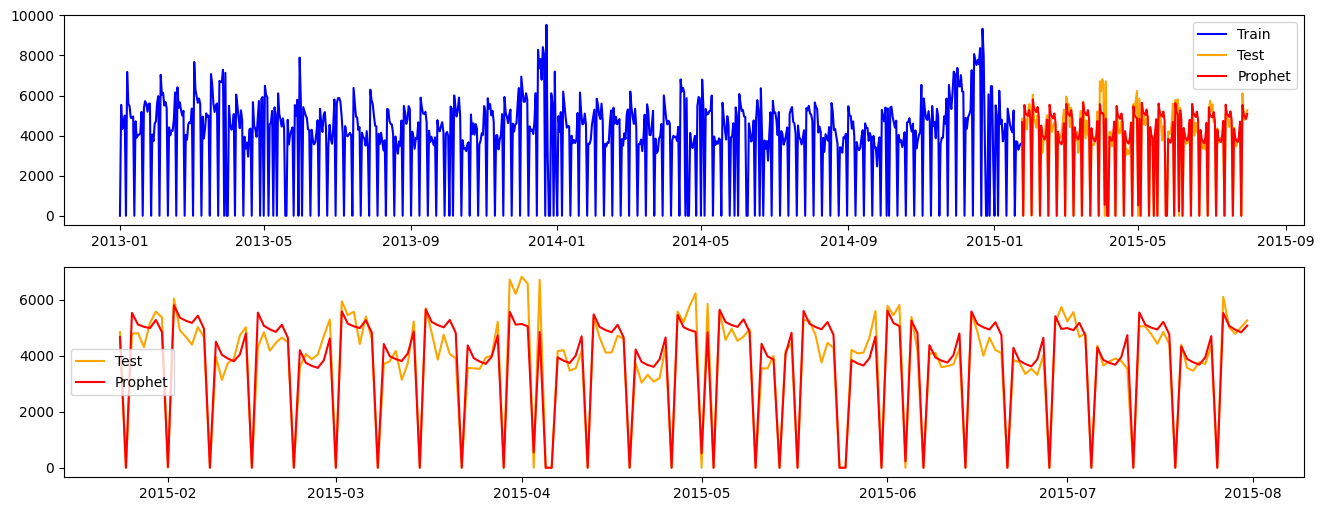

In [ ]:
fig ,axes =plt.subplots(2,1)
fig.set_figheight(6)
fig.set_figwidth(16)

axes[0].plot(train_data["Sales"], label='Train',color='blue')
axes[0].plot(test_data["Sales"], label='Test',color='orange')

axes[0].plot(prophet_preds,label="Prophet",color='red')
axes[0].legend(loc='best')

axes[1].plot(test_data["Sales"], label='Test',color='orange')
axes[1].plot(prophet_preds,label="Prophet",color='red')
axes[1].legend(loc='best')
plt.show()

# LightGBM

In [ ]:
from lightgbm import LGBMRegressor

In [ ]:
lgbm_model = LGBMRegressor(random_state=42)

In [ ]:
def prepare_df_ml(df):
    new_df = df.copy(deep=True)
    new_df.drop(["StateHoliday"], inplace=True, axis=1)
    new_df['day'] = new_df.index.day.astype(int)
    new_df['month'] = new_df.index.month.astype(int)
    new_df['year'] = new_df.index.year.astype(int)
    new_df['DayOfYear'] = new_df.index.dayofyear.astype(int)
    new_df['WeekOfYear'] = new_df.index.isocalendar().week.astype(int)
    df_prep_X = new_df.drop("Sales", axis=1)
    df_prep_Y = new_df["Sales"]
    return df_prep_X, df_prep_Y

In [ ]:
train_prep_X, train_prep_Y = prepare_df_ml(train_data)


In [ ]:
lgbm_model.fit(train_prep_X, train_prep_Y)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000416 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 368
[LightGBM] [Info] Number of data points in the train set: 753, number of used features: 9
[LightGBM] [Info] Start training from score 3996.416999
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

LGBMRegressor(random_state=42)

In [ ]:
lgbm_train_preds = lgbm_model.predict(train_prep_X)
lgbm_train_preds = pd.Series(lgbm_train_preds, index= train_prep_X.index)
lgbm_train_preds = lgbm_train_preds.clip(lower=0)
lgbm_train_preds[train_prep_X["Open"] == 0] = 0
print(f'RMSPE for LGBM on Train:{rmspe(lgbm_train_preds,train_prep_Y)}')


RMSPE for LGBM on Train:0.07557671067339185


In [ ]:
test_prep_X, test_prep_Y = prepare_df_ml(test_data)

In [ ]:
lgbm_preds = lgbm_model.predict(test_prep_X)
lgbm_test_preds = lgbm_model.predict(test_prep_X)
lgbm_test_preds = pd.Series(lgbm_test_preds, index= test_prep_X.index)
lgbm_test_preds = lgbm_test_preds.clip(lower=0)
lgbm_test_preds[test_prep_X["Open"] == 0] = 0
print(f'RMSPE for LGBM on Test:{rmspe(lgbm_test_preds,test_prep_Y)}')

RMSPE for LGBM on Test:0.2531316774758798


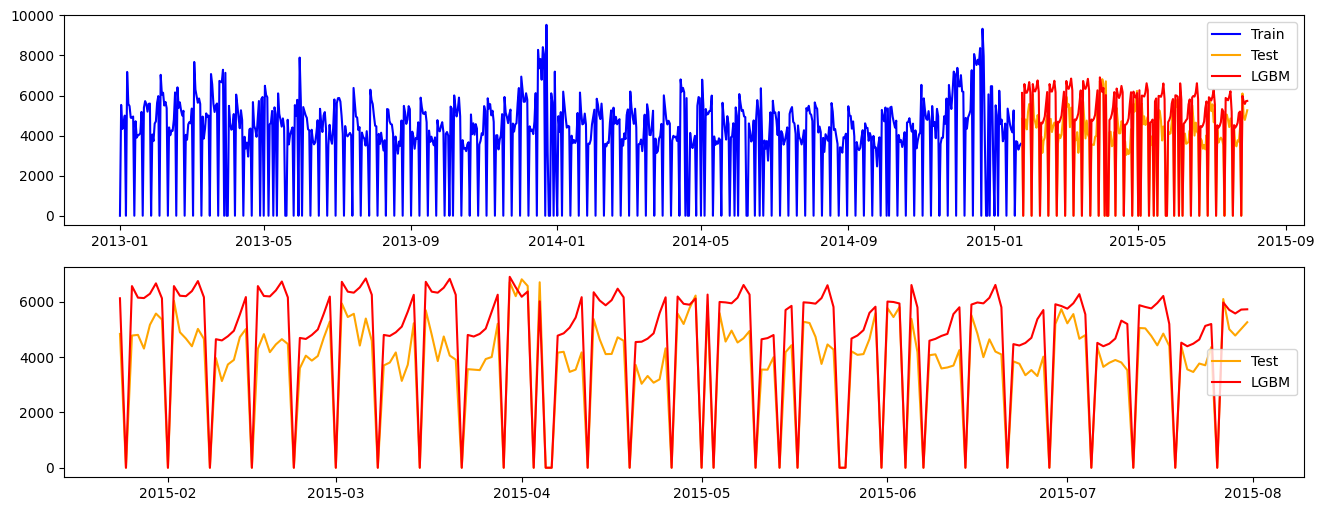

In [ ]:
fig ,axes =plt.subplots(2,1)
fig.set_figheight(6)
fig.set_figwidth(16)

axes[0].plot(train_data["Sales"], label='Train',color='blue')
axes[0].plot(test_data["Sales"], label='Test',color='orange')

axes[0].plot(lgbm_test_preds,label="LGBM",color='red')
axes[0].legend(loc='best')

axes[1].plot(test_data["Sales"], label='Test',color='orange')
axes[1].plot(lgbm_test_preds,label="LGBM",color='red')
axes[1].legend(loc='best')
plt.show()

In [ ]:
from itertools import product

In [ ]:
# Define the parameter grid for grid search
param_grid = {
    'learning_rate': [0.01, 0.1],  # Learning rate for boosting
    'n_estimators': [100, 200, 300],  # Number of boosting iterations
    'reg_alpha': [0.0, 0.1, 0.5],  # L1 regularization term on weights
    'reg_lambda': [0.0, 0.1, 0.5],  # L2 regularization term on weights
    'max_depth': [-1, 5, 10],  # Maximum depth of a tree
}

# Generate all possible combinations of hyperparameters
param_combinations = list(product(*param_grid.values()))

# Create lists to store the results
best_params = None
best_model = None
best_rmspe = float('inf')

# Iterate over each parameter combination
for params in tqdm(param_combinations):
    # Create the LGBMRegressor model with the current hyperparameters
    lgbm_model = LGBMRegressor(random_state=42, **dict(zip(param_grid.keys(), params)))

    # Fit the model to the training data
    lgbm_model.fit(train_prep_X, train_prep_Y)

    # Make predictions on the test data
    lgbm_test_preds = lgbm_model.predict(test_prep_X)
    lgbm_test_preds = pd.Series(lgbm_test_preds, index=test_prep_X.index)
    lgbm_test_preds = lgbm_test_preds.clip(lower=0)
    lgbm_test_preds[test_prep_X["Open"] == 0] = 0
    # Calculate RMSPE
    rmspe_value = rmspe(lgbm_test_preds, test_prep_Y)

    # Check if the current model has the best RMSPE
    if rmspe_value < best_rmspe:
        best_rmspe = rmspe_value
        print(f"  Found new best RMSPE: {best_rmspe}")
        best_params = params
        best_model = lgbm_model

# Print the best hyperparameters and RMSPE
print(f"Best Parameters: {dict(zip(param_grid.keys(), best_params))}")
print(f"RMSPE for Best LGBM on Test: {best_rmspe}")

  1%|          | 1/162 [00:00<00:25,  6.21it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000152 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 368
[LightGBM] [Info] Number of data points in the train set: 753, number of used features: 9
[LightGBM] [Info] Start training from score 3996.416999
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

  1%|          | 2/162 [00:00<00:25,  6.18it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

  2%|▏         | 3/162 [00:00<00:29,  5.40it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

  3%|▎         | 5/162 [00:00<00:24,  6.51it/s]


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

  4%|▎         | 6/162 [00:00<00:22,  6.79it/s]


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

  5%|▍         | 8/162 [00:01<00:20,  7.41it/s]


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

  6%|▌         | 9/162 [00:01<00:22,  6.93it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

  7%|▋         | 11/162 [00:01<00:20,  7.32it/s]


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

  7%|▋         | 12/162 [00:01<00:20,  7.15it/s]


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

  9%|▊         | 14/162 [00:02<00:19,  7.45it/s]


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

  9%|▉         | 15/162 [00:02<00:20,  7.30it/s]


[LightGBM] [Info] Total Bins 368
[LightGBM] [Info] Number of data points in the train set: 753, number of used features: 9
[LightGBM] [Info] Start training from score 3996.416999
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

 10%|█         | 17/162 [00:02<00:18,  7.63it/s]


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

 11%|█         | 18/162 [00:02<00:19,  7.23it/s]

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000126 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 368
[LightGBM] [Info] Number of data points in the train set: 753, number of used features: 9
[LightGBM] [Info] Start training from score 3996.416999
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

 12%|█▏        | 20/162 [00:02<00:18,  7.68it/s]


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

 13%|█▎        | 21/162 [00:03<00:18,  7.42it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

 14%|█▍        | 23/162 [00:03<00:17,  7.74it/s]


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

 15%|█▍        | 24/162 [00:03<00:19,  7.12it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

 15%|█▌        | 25/162 [00:03<00:19,  7.12it/s]


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

 16%|█▌        | 26/162 [00:03<00:19,  6.87it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

 17%|█▋        | 27/162 [00:03<00:23,  5.67it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000134 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you 

 17%|█▋        | 28/162 [00:04<00:31,  4.30it/s]

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000127 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 368
[LightGBM] [Info] Number of data points in the train set: 753, number of used features: 9
[LightGBM] [Info] Start training from score 3996.416999
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

 18%|█▊        | 29/162 [00:04<00:35,  3.74it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

 19%|█▊        | 30/162 [00:05<00:43,  3.05it/s]


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

 19%|█▉        | 31/162 [00:05<00:45,  2.86it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

 20%|█▉        | 32/162 [00:05<00:44,  2.90it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000172 seconds.
You can set `force_col_wise=true` to remove the overhead

 20%|██        | 33/162 [00:06<00:50,  2.58it/s]


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000125 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 368
[LightGBM] [Info] Number of data points in the train set: 753, number of used feature

 21%|██        | 34/162 [00:06<00:57,  2.23it/s]

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000132 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 368
[LightGBM] [Info] Number of data points in the train set: 753, number of used features: 9
[LightGBM] [Info] Start training from score 3996.416999
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

 22%|██▏       | 35/162 [00:07<00:54,  2.34it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

 22%|██▏       | 36/162 [00:07<01:01,  2.05it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000125 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 368
[LightGBM] [Info] Number of data points in the train set: 753, number of used features: 9
[LightGBM] [Info] Start training from score 3996.416999
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [War

 23%|██▎       | 37/162 [00:08<00:58,  2.14it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

 23%|██▎       | 38/162 [00:08<00:52,  2.34it/s]


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000118 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 368
[LightGBM] [Info] Number of data points in the train set: 753, number of used features: 9
[LightGBM] [Info] Start training fr

 24%|██▍       | 39/162 [00:09<00:54,  2.25it/s]


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000121 seconds.
You can set `fo

 25%|██▍       | 40/162 [00:09<00:50,  2.41it/s]

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000209 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 368
[LightGBM] [Info] Number of data points in the train set: 753, number of used features: 9
[LightGBM] [Info] Start training from score 3996.416999
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

 25%|██▌       | 41/162 [00:09<00:43,  2.77it/s]

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000123 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 368
[LightGBM] [Info] Number of data points in the train set: 753, number of used features: 9
[LightGBM] [Info] Start training from score 3996.416999
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

 26%|██▌       | 42/162 [00:10<00:42,  2.84it/s]


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

 27%|██▋       | 43/162 [00:10<00:42,  2.79it/s]


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

 27%|██▋       | 44/162 [00:10<00:40,  2.88it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

 28%|██▊       | 45/162 [00:11<00:54,  2.13it/s]

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000123 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 368
[LightGBM] [Info] Number of data points in the train set: 753, number of used features: 9
[LightGBM] [Info] Start training from score 3996.416999
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [War

 28%|██▊       | 46/162 [00:12<01:01,  1.88it/s]

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000130 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 368
[LightGBM] [Info] Number of data points in the train set: 753, number of used features: 9
[LightGBM] [Info] Start training from score 3996.416999
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

 29%|██▉       | 47/162 [00:12<00:57,  1.99it/s]

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000145 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 368
[LightGBM] [Info] Number of data points in the train set: 753, number of used features: 9
[LightGBM] [Info] Start training from score 3996.416999
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

 30%|██▉       | 48/162 [00:13<01:09,  1.64it/s]


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000152 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 368
[LightGBM]

 30%|███       | 49/162 [00:14<01:07,  1.67it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

 31%|███       | 50/162 [00:14<00:59,  1.89it/s]

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000126 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 368
[LightGBM] [Info] Number of data points in the train set: 753, number of used features: 9
[LightGBM] [Info] Start training from score 3996.416999
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

 31%|███▏      | 51/162 [00:15<01:17,  1.43it/s]

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000126 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 368
[LightGBM] [Info] Number of data points in the train set: 753, number of used features: 9
[LightGBM] [Info] Start training from score 3996.416999
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [War

 32%|███▏      | 52/162 [00:16<01:09,  1.58it/s]

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000143 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 368
[LightGBM] [Info] Number of data points in the train set: 753, number of used features: 9
[LightGBM] [Info] Start training from score 3996.416999
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

 33%|███▎      | 53/162 [00:16<00:58,  1.86it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

 33%|███▎      | 54/162 [00:16<00:47,  2.28it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000131 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 368
[LightGBM] [Info] Number of data points in the train set: 753, number of used features: 9
[LightGBM] [Info] Start training from score 3996.416999
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [War

 34%|███▍      | 55/162 [00:16<00:41,  2.58it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

 35%|███▍      | 56/162 [00:17<00:36,  2.94it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

 35%|███▌      | 57/162 [00:17<00:33,  3.10it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000119 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 368
[LightGBM] [Info] Number of data points in the train set: 753, number of used features: 9
[LightGBM] [Info] Start training from score 3996.416999
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

 36%|███▌      | 58/162 [00:17<00:32,  3.20it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

 36%|███▋      | 59/162 [00:17<00:29,  3.45it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

 37%|███▋      | 60/162 [00:18<00:29,  3.49it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

 38%|███▊      | 61/162 [00:18<00:28,  3.50it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth >

 38%|███▊      | 62/162 [00:18<00:27,  3.67it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

 39%|███▉      | 63/162 [00:18<00:26,  3.70it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

 40%|███▉      | 64/162 [00:19<00:26,  3.72it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

 40%|████      | 65/162 [00:19<00:25,  3.88it/s]

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000144 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 368
[LightGBM] [Info] Number of data points in the train set: 753, number of used features: 9
[LightGBM] [Info] Start training from score 3996.416999
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

 41%|████      | 66/162 [00:19<00:25,  3.83it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

 41%|████▏     | 67/162 [00:19<00:24,  3.80it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

 42%|████▏     | 68/162 [00:20<00:23,  3.98it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

 43%|████▎     | 69/162 [00:20<00:23,  3.89it/s]

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000120 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 368
[LightGBM] [Info] Number of data points in the train set: 753, number of used features: 9
[LightGBM] [Info] Start training from score 3996.416999
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [War

 43%|████▎     | 70/162 [00:20<00:24,  3.81it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

 44%|████▍     | 71/162 [00:20<00:23,  3.92it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

 44%|████▍     | 72/162 [00:21<00:23,  3.88it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

 45%|████▌     | 73/162 [00:21<00:23,  3.77it/s]

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000120 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 368
[LightGBM] [Info] Number of data points in the train set: 753, number of used features: 9
[LightGBM] [Info] Start training from score 3996.416999
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

 46%|████▌     | 74/162 [00:21<00:22,  3.86it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000127 seconds.
You can set `force_row_wise=true` to remove the overhead

 46%|████▋     | 75/162 [00:22<00:22,  3.84it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

 47%|████▋     | 76/162 [00:22<00:22,  3.77it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

 48%|████▊     | 77/162 [00:22<00:21,  3.93it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

 48%|████▊     | 78/162 [00:22<00:22,  3.75it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

 49%|████▉     | 79/162 [00:23<00:22,  3.75it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

 49%|████▉     | 80/162 [00:23<00:21,  3.86it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

 51%|█████     | 82/162 [00:23<00:17,  4.63it/s]

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000169 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 368
[LightGBM] [Info] Number of data points in the train set: 753, number of used features: 9
[LightGBM] [Info] Start training from score 3996.416999
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig

 52%|█████▏    | 84/162 [00:23<00:12,  6.28it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

 54%|█████▎    | 87/162 [00:24<00:09,  7.95it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

 54%|█████▍    | 88/162 [00:24<00:09,  8.07it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

 56%|█████▌    | 90/162 [00:24<00:07,  9.01it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

 57%|█████▋    | 92/162 [00:24<00:07,  9.55it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

 58%|█████▊    | 94/162 [00:24<00:07,  9.70it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

 60%|██████    | 98/162 [00:25<00:06, 10.30it/s]

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000181 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 368
[LightGBM] [Info] Number of data points in the train set: 753, number of used features: 9
[LightGBM] [Info] Start training from score 3996.416999
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [War

 62%|██████▏   | 100/162 [00:25<00:06,  9.98it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

 64%|██████▎   | 103/162 [00:25<00:06,  8.80it/s]

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000138 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 368
[LightGBM] [Info] Number of data points in the train set: 753, number of used features: 9
[LightGBM] [Info] Start training from score 3996.416999
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [War

 64%|██████▍   | 104/162 [00:25<00:06,  8.79it/s]


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

 65%|██████▌   | 106/162 [00:26<00:07,  7.86it/s]

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000129 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 368
[LightGBM] [Info] Number of data points in the train set: 753, number of used features: 9
[LightGBM] [Info] Start training from score 3996.416999
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [War

 67%|██████▋   | 108/162 [00:26<00:07,  7.71it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

 68%|██████▊   | 110/162 [00:26<00:08,  6.32it/s]

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000134 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 368
[LightGBM] [Info] Number of data points in the train set: 753, number of used features: 9
[LightGBM] [Info] Start training from score 3996.416999
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

 69%|██████▊   | 111/162 [00:27<00:09,  5.22it/s]

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000127 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 368
[LightGBM] [Info] Number of data points in the train set: 753, number of used features: 9
[LightGBM] [Info] Start training from score 3996.416999
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [War

 70%|██████▉   | 113/162 [00:27<00:09,  5.03it/s]

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000140 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 368
[LightGBM] [Info] Number of data points in the train set: 753, number of used features: 9
[LightGBM] [Info] Start training from score 3996.416999
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

 70%|███████   | 114/162 [00:27<00:10,  4.56it/s]


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000109 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 368
[LightGBM] [Info] Number of data points in the train set: 753, number of used features: 9
[LightGBM] [Info] Start training from score 3996.416999
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Wa

 71%|███████   | 115/162 [00:28<00:10,  4.33it/s]


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

 72%|███████▏  | 116/162 [00:28<00:09,  4.67it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

 72%|███████▏  | 117/162 [00:28<00:09,  4.55it/s]


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

 73%|███████▎  | 118/162 [00:28<00:10,  4.31it/s]


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

 73%|███████▎  | 119/162 [00:28<00:09,  4.64it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

 74%|███████▍  | 120/162 [00:29<00:09,  4.34it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

 75%|███████▌  | 122/162 [00:29<00:08,  4.45it/s]

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000131 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 368
[LightGBM] [Info] Number of data points in the train set: 753, number of used features: 9
[LightGBM] [Info] Start training from score 3996.416999
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

 76%|███████▌  | 123/162 [00:29<00:09,  4.17it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000119 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 368
[LightGBM] [Info] Number of data points in the train set: 753, number of used features

 77%|███████▋  | 124/162 [00:30<00:09,  3.97it/s]


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

 77%|███████▋  | 125/162 [00:30<00:08,  4.31it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

 78%|███████▊  | 126/162 [00:30<00:08,  4.04it/s]


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

 79%|███████▉  | 128/162 [00:31<00:07,  4.55it/s]

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000131 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 368
[LightGBM] [Info] Number of data points in the train set: 753, number of used features: 9
[LightGBM] [Info] Start training from score 3996.416999
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

 80%|███████▉  | 129/162 [00:31<00:06,  4.75it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

 80%|████████  | 130/162 [00:31<00:06,  4.85it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

 81%|████████  | 131/162 [00:31<00:05,  5.19it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

 81%|████████▏ | 132/162 [00:31<00:05,  5.11it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

 82%|████████▏ | 133/162 [00:32<00:05,  5.15it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

 83%|████████▎ | 134/162 [00:32<00:05,  5.37it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM]

 83%|████████▎ | 135/162 [00:32<00:05,  5.36it/s]

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000141 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 368
[LightGBM] [Info] Number of data points in the train set: 753, number of used features: 9
[LightGBM] [Info] Start training from score 3996.416999
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [War

 84%|████████▍ | 136/162 [00:32<00:05,  4.67it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

 85%|████████▍ | 137/162 [00:32<00:05,  4.63it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

 85%|████████▌ | 138/162 [00:33<00:05,  4.34it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

 86%|████████▌ | 139/162 [00:33<00:05,  4.11it/s]

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000130 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 368
[LightGBM] [Info] Number of data points in the train set: 753, number of used features: 9
[LightGBM] [Info] Start training from score 3996.416999
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

 86%|████████▋ | 140/162 [00:33<00:05,  4.08it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000170 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 368
[LightGBM] [Info] Number of data points in the train set: 753, number of used features: 9
[LightGBM] [Info] Start training from score 3996.416999
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

 87%|████████▋ | 141/162 [00:33<00:05,  3.88it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

 88%|████████▊ | 142/162 [00:34<00:05,  3.86it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

 88%|████████▊ | 143/162 [00:34<00:04,  4.06it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

 89%|████████▉ | 144/162 [00:34<00:04,  3.77it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accu

 90%|████████▉ | 145/162 [00:35<00:04,  3.63it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

 90%|█████████ | 146/162 [00:35<00:04,  3.77it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

 91%|█████████ | 147/162 [00:35<00:04,  3.62it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

 91%|█████████▏| 148/162 [00:35<00:03,  3.54it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

 92%|█████████▏| 149/162 [00:36<00:03,  3.77it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

 93%|█████████▎| 150/162 [00:36<00:03,  3.66it/s]

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000155 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 368
[LightGBM] [Info] Number of data points in the train set: 753, number of used features: 9
[LightGBM] [Info] Start training from score 3996.416999
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [War

 93%|█████████▎| 151/162 [00:36<00:03,  3.58it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

 94%|█████████▍| 152/162 [00:36<00:02,  3.75it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

 94%|█████████▍| 153/162 [00:37<00:02,  3.68it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

 95%|█████████▌| 154/162 [00:37<00:02,  3.58it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

 96%|█████████▌| 155/162 [00:37<00:01,  3.73it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

 96%|█████████▋| 156/162 [00:38<00:01,  3.64it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000130 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 368
[LightGBM] [Info] Number of data points in the train set: 753, number of used features: 9
[LightGBM] [Info] Start training from score 3996.416999
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

 97%|█████████▋| 157/162 [00:38<00:01,  3.56it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

 98%|█████████▊| 158/162 [00:38<00:01,  3.77it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

 98%|█████████▊| 159/162 [00:38<00:00,  3.72it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

 99%|█████████▉| 160/162 [00:39<00:00,  3.47it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

 99%|█████████▉| 161/162 [00:39<00:00,  3.60it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

100%|██████████| 162/162 [00:39<00:00,  4.07it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Best Parameters: {'learning_rate': 0.01, 'n_estimators': 100, 'reg_alpha': 0.0, 'reg_lambda': 0.1, 'max_depth': 5}
RMSPE for Best LGBM on Test: 0.14004808869350155


In [ ]:

import pandas as pd
lgbm_test_preds = best_model.predict(test_prep_X)
lgbm_test_preds = pd.Series(lgbm_test_preds, index=test_prep_X.index)
lgbm_test_preds = lgbm_test_preds.clip(lower=0)
lgbm_test_preds[test_prep_X["Open"] == 0] = 0
r2_score_lgbm = r2_score(test_prep_Y, lgbm_test_preds)
mae_score_lgbm = mean_absolute_error(test_prep_Y, lgbm_test_preds)
print("R2 Score of Best LGBM Model:", r2_score_lgbm)
print("MAE Score of Best LGBM Model:", mae_score_lgbm)


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
R2 Score of Best LGBM Model: 0.9213885896637856
MAE Score of Best LGBM Model: 370.28042521480137


In [ ]:
lgbm_preds = lgbm_model.predict(test_prep_X)
lgbm_test_preds = lgbm_model.predict(test_prep_X)
lgbm_test_preds = pd.Series(lgbm_test_preds, index= test_prep_X.index)
lgbm_test_preds = lgbm_test_preds.clip(lower=0)
lgbm_test_preds[test_prep_X["Open"] == 0] = 0
print(f'RMSPE for LGBM on Test:{rmspe(lgbm_test_preds,test_prep_Y)}')

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
RMSPE for LGBM on Test:0.27195870523725646


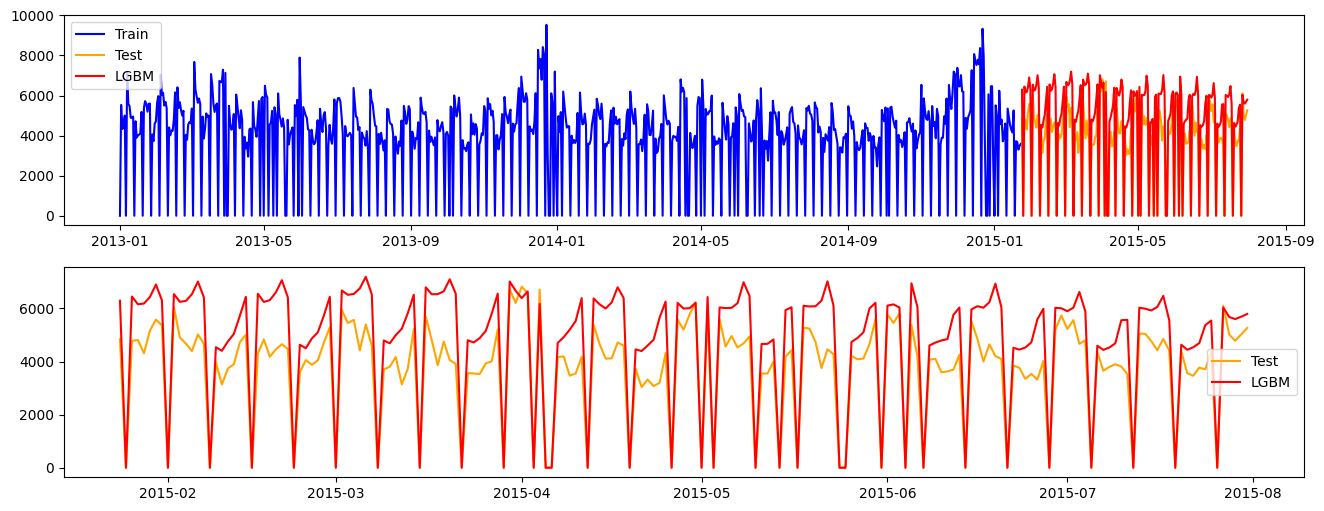

In [ ]:
fig ,axes =plt.subplots(2,1)
fig.set_figheight(6)
fig.set_figwidth(16)

axes[0].plot(train_data["Sales"], label='Train',color='blue')
axes[0].plot(test_data["Sales"], label='Test',color='orange')

axes[0].plot(lgbm_test_preds,label="LGBM",color='red')
axes[0].legend(loc='best')

axes[1].plot(test_data["Sales"], label='Test',color='orange')
axes[1].plot(lgbm_test_preds,label="LGBM",color='red')
axes[1].legend(loc='best')
plt.show()

# SARIMAX with AutoCorrelation

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [ ]:
def autocorrelatin_graphs(value,n_lags,title_text):
    fig, axes = plt.subplots(3,1,dpi=80)
    fig.set_figheight(12)
    fig.set_figwidth(16)
    value_plot = axes[0].plot(value)
    plt.title(f'{title_text}')
    acf_plot = plot_acf(value, lags=n_lags, title=f'Autocorrelation in {title_text}',ax=axes[1])
    plt.xlabel('Lags')
    pacf_plot = plot_acf(value, lags=n_lags, title=f'Partial Autocorrelation in {title_text}',ax=axes[2])
    plt.xlabel('Lags')
    plt.tight_layout()
    plt.show()

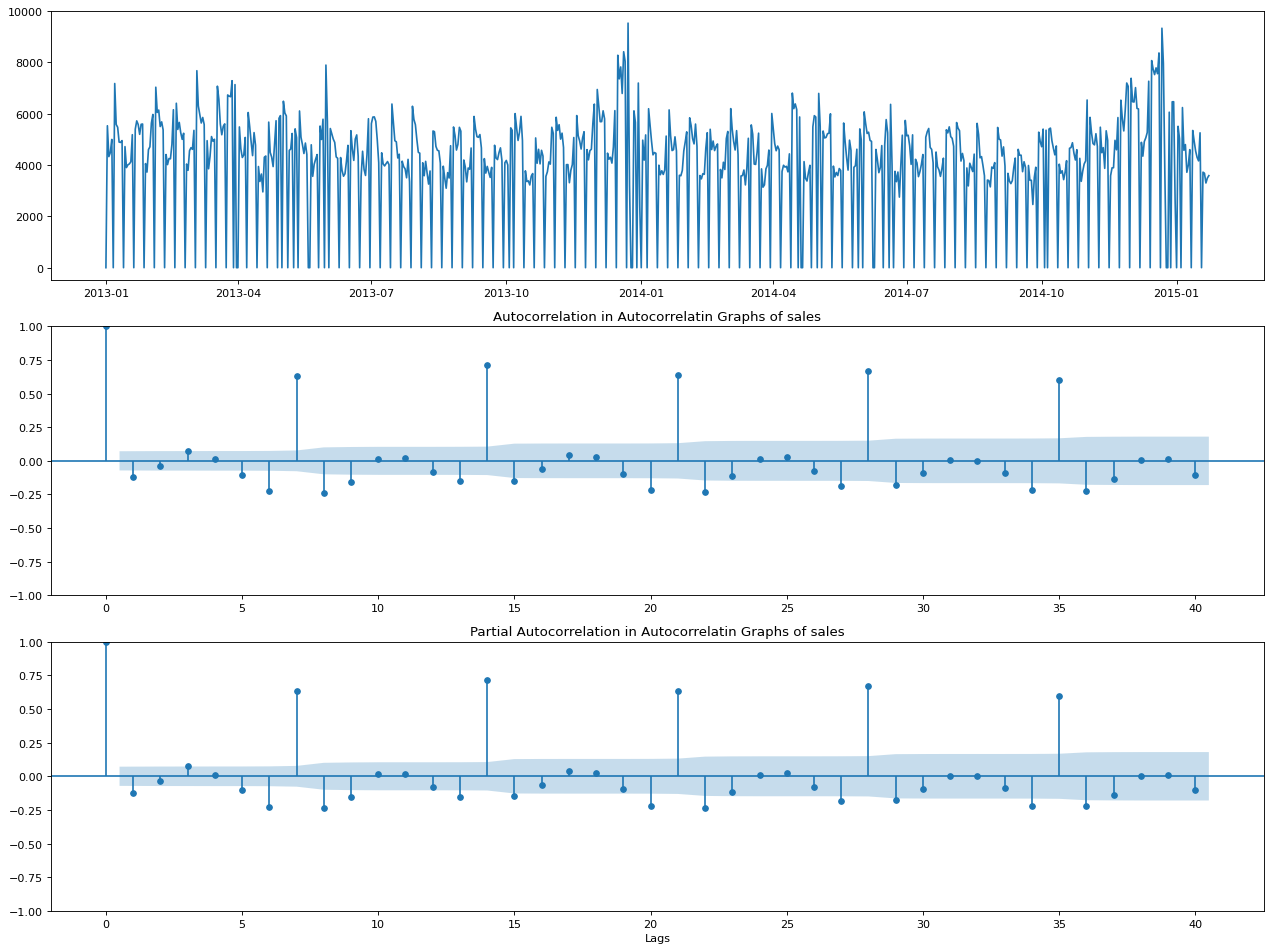

In [ ]:
autocorrelatin_graphs(train_data[["Sales"]], n_lags=40, title_text="Autocorrelatin Graphs of sales")

In [ ]:
SARIMAX_model = SARIMAX(train_data[["Sales"]], order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))
SARIMAX_model_fit = SARIMAX_model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
SARIMAX_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             Sales   No. Observations:                  753
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood               -6330.115
Date:                           Wed, 01 May 2024   AIC                          12670.230
Time:                                   10:29:40   BIC                          12693.297
Sample:                               01-01-2013   HQIC                         12679.121
                                    - 01-23-2015                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2130      0.020     10.866      0.000       0.175       0.251
ma.L1         -0.9488      0.009   -100.228      0.000      -0.967      -0.930
ar.S.L7       -0.0738      0.026     -2.811      0.005      -0.125      -0.022
ma.S.L7       -0.9986      0.027    -36.583      0.000      -1.052      -0.945
sigma2      1.339e+06   2.12e-08   6.32e+13      0.000    1.34e+06    1.34e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.24   Jarque-Bera (JB):              1576.79
Prob(Q):                              0.62   Prob(JB):                         0.00
Heteroskedasticity (H):               1.00   Skew:                            -1.42
Prob(H) (two-sided):                  0.97   Kurtosis:                         9.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number  1e+28. Standard errors may be unstable.
"""

In [ ]:
start_index = test_data.index.min()
end_index = test_data.index.max()

#Predictions
SARIMAX_preds = SARIMAX_model_fit.predict(start=start_index, end=end_index)

In [ ]:
SARIMAX_preds[test_data["Open"] == 0] = 0

In [ ]:

mae_score_sarimax = mean_absolute_error(test_data["Sales"], SARIMAX_preds)
r2_score_sarimax = r2_score(test_data["Sales"], SARIMAX_preds)
print("R2 Score of SARIMAX Model:", r2_score_sarimax)
print("MAE Score of SARIMAX Model:", mae_score_sarimax)


R2 Score of SARIMAX Model: 0.8430546801557885
MAE Score of SARIMAX Model: 549.0640552022387


In [ ]:
print(f'RMSPE for SARIMAX on test:{rmspe(SARIMAX_preds,test_data[["Sales"]])}')

RMSPE for SARIMAX on test:0.19476948070608127


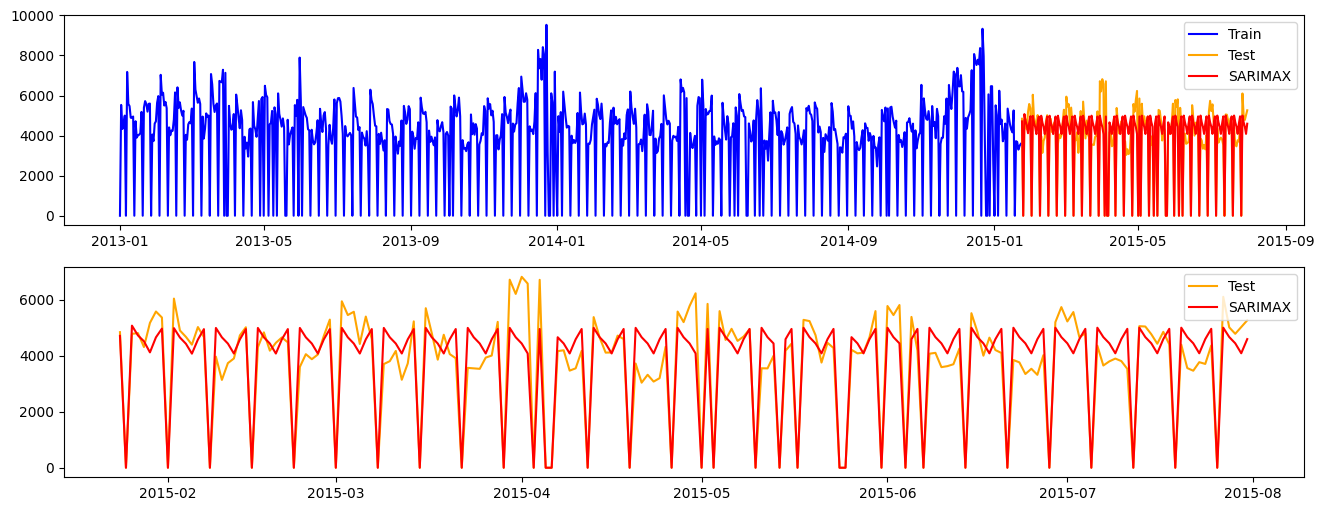

In [ ]:
fig ,axes =plt.subplots(2,1)
fig.set_figheight(6)
fig.set_figwidth(16)

axes[0].plot(train_data["Sales"], label='Train',color='blue')
axes[0].plot(test_data["Sales"], label='Test',color='orange')

axes[0].plot(SARIMAX_preds,label="SARIMAX",color='red')
axes[0].legend(loc='best')

axes[1].plot(test_data["Sales"], label='Test',color='orange')
axes[1].plot(SARIMAX_preds,label="SARIMAX",color='red')
axes[1].legend(loc='best')
plt.show()

#Feature Importance

In [ ]:
# Get the feature importances from the trained model
feature_importance = random_forest_regressor_model.feature_importances_

# Assuming x_train is a DataFrame, get the feature names directly
feature_names = x_train.columns.tolist()

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Features': feature_names,
    'Importance': feature_importance
})

# Sort the DataFrame by importance values in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the sorted DataFrame
feature_importance_df


Features  Importance
7         CompetitionDistance    0.206689
0                       Store    0.178690
2                       Promo    0.139146
9    CompetitionOpenSinceYear    0.077360
8   CompetitionOpenSinceMonth    0.069885
1                   DayOfWeek    0.068497
15                      Month    0.062962
5                   StoreType    0.034608
12            Promo2SinceYear    0.032484
6                  Assortment    0.031923
11            Promo2SinceWeek    0.030026
14                       Year    0.023475
13              PromoInterval    0.013608
16            Derived_DayName    0.013131
4               SchoolHoliday    0.012803
10                     Promo2    0.003493
3                StateHoliday    0.001221

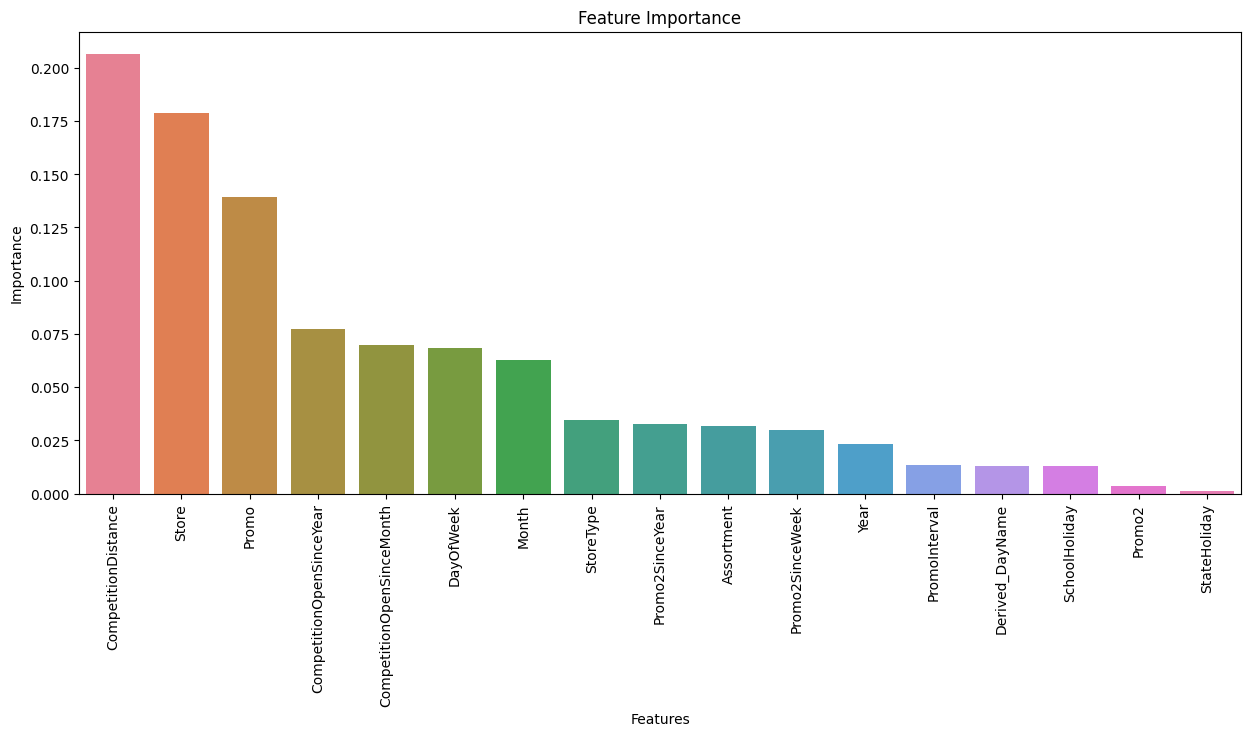

In [ ]:
palette = "husl"  # Example palette, you can choose any other palette provided by Seaborn

plt.figure(figsize=(15, 6))

sns.barplot(x=feature_importance_df['Features'], y=feature_importance_df['Importance'],
            data=feature_importance_df, palette=palette)

plt.title('Feature Importance')
plt.xticks(rotation=90)
plt.show()

Steps:

- Data Preprocessing: Sort the Data:
The data is sorted by 'Store' and then by date-related columns like 'Year', 'Month', and 'DayOfWeek'.

- Create Sequences:
For each store, create sequences of a chosen length. The sequence length would determine how many past data points the model would consider when making a prediction

- Split Data:
Split the reshaped data into training and testing subsets. We have already done this earlier, but for LSTM, now we are using x_train_seq and y_train_seq

- Build the LSTM Model

- Train the Model

Observation:

- The training and validation losses are decreasing and start to stabilize after approximately 8 epochs. This suggests that the model is learning and converging towards a minimum error.

- The difference between the training and validation loss is minimal, especially in the later epochs. This indicates that the model isn't overfitting much to the training data and is likely to generalize well on unseen data.

Given the consistent decrease in both training and validation loss and the stabilization of these values, it seems that the model is performing well